In [1]:
%matplotlib inline
import os
os.environ['PY3_PROD'] = '1'
%load_ext autoreload
%autoreload 2
os.system('kinit')

1

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import sys

import pandas as pd
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

import copy
import numpy as np
import math
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import datetime
import itertools
sys.path.append("C:/dev/pyktrader3/")
from pycmqlib3.utility import misc
from pycmqlib3.utility import dataseries
from pycmqlib3.utility import dbaccess
from bktest import backtest
import pycmqlib3.analytics.data_handler as dh


# product group and starting date

In [4]:
ferrous_products_mkts = ['rb', 'hc', 'i', 'j', 'jm']
ferrous_mixed_mkts = ['ru', 'FG', 'SM', "SF", 'nr']
base_metal_mkts = ['cu', 'al', 'zn', 'pb', 'ni', 'sn', 'ss']
precious_metal_mkts = ['au', 'ag']
ind_metal_mkts = ferrous_products_mkts + ferrous_mixed_mkts + base_metal_mkts  
petro_chem_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'fu', 'eg', 'eb', 'lu', 'pg', 'PF'] 
ind_all_mkts = ind_metal_mkts + petro_chem_mkts
ags_oil_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs'] #, 'b']
ags_soft_mkts = ['CF', 'SR', 'jd', 'AP', 'sp', 'CJ', 'UR', 'SA', 'lh', 'PK'] # 'CY', 
ags_all_mkts = ags_oil_mkts + ags_soft_mkts
eq_fut_mkts = ['IF', 'IH', 'IC']
bond_fut_mkts = ['T', 'TF']
fin_all_mkts = eq_fut_mkts + bond_fut_mkts
commod_all_mkts = ind_all_mkts + ags_all_mkts + precious_metal_mkts
all_markets = commod_all_mkts + fin_all_mkts

daily_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2015,12,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,6,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2019,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,9,1),  'sn':datetime.date(2017,5,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2016, 4, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 10, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2016, 7, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2019,4,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 2, 1), 'eg': datetime.date(2019, 4, 2), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 9, 5), 'lu': datetime.date(2020, 10, 1), 'nr': datetime.date(2020,1,1),
    'lh': datetime.date(2021,5,1), 'PF': datetime.date(2021,1,1), 'PK': datetime.date(2021,4,1), }

min_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,6,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2014,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,5,1),  'sn':datetime.date(2017,4,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2016, 4, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2016, 7, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 5, 1), 'lu': datetime.date(2020, 10, 1), 'nr': datetime.date(2020,1,1),
    'lh': datetime.date(2021,5,1),}

In [6]:
from numpy.lib.stride_tricks import sliding_window_view

def rolling_percentile(ts, win = 100, direction = 'max'):
    data = ts.to_numpy()
    sw = sliding_window_view(data, win, axis=0).T
    scores_np = np.empty(len(ts))
    scores_np.fill(np.nan)
    scores_np[(win-1):] = ((sw <= sw[-1:, ...]).sum(axis=0).T / sw.shape[0]).flatten()
    scores_np_ts = pd.Series(scores_np, index = ts.index)
    if direction == 'min':
        scores_np_ts = 1 - scores_np_ts
    return scores_np_ts


# load historical data

In [5]:
field_list = ['open', 'high', 'low', 'close', 'volume', 'openInterest', 'contract', 'shift']
factor_list = ['lrstd','upstd','lrskew','lrkurt','mincnt','volmf','oimf','trdstr','volmfratio']
shared_cols = ['date', 'split_idx']
start_date = datetime.date(2011, 1, 1)
end_date = datetime.date(2023,1,10)

delimiter = '-'
rev_char = '!'
atr_win = 20
file_folder = "C:\\dev\\data\\data_cache\\"

sim_products = ind_all_mkts + ags_all_mkts + ['T', 'TF', 'au']  # ['IF', 'IH', 'IC'] #
shift_mode = 1
freq = 'd'

old_nearby = True
if old_nearby:
    nearby_func = misc.nearby
else:
    nearby_func = dataseries.nearby

if freq == 'd':
    sim_start_dict = daily_start_dict
else:
    sim_start_dict = min_start_dict
    
args = {'roll_rule': '-30b', 'freq': freq, 'shift_mode': shift_mode}
ferrous_products_args = args
ferro_mixed_mkt_args = args
base_args = {'roll_rule': '-25b', 'freq': freq, 'shift_mode': shift_mode}
base2_args = {'roll_rule': '-35b', 'freq': freq, 'shift_mode': shift_mode}
v_args  = {'roll_rule': '-25b', 'freq': freq, 'shift_mode': shift_mode}
sc_args = {'roll_rule': '-20b', 'freq': freq, 'shift_mode': shift_mode}
lu_args = {'roll_rule': '-45b', 'freq': freq, 'shift_mode': shift_mode}
eq_args = {'roll_rule': '-1b', 'freq': freq, 'shift_mode': shift_mode}
bond_args = {'roll_rule': '-20b', 'freq': freq, 'shift_mode': shift_mode}
precious_args = {'roll_rule': '-15b', 'freq': freq, 'shift_mode': shift_mode}

df_list = []

for idx, asset in enumerate(sim_products):
    use_args = copy.copy(args)
    if asset in eq_fut_mkts:
        use_args = eq_args
    elif asset in ['cu', 'al', 'zn', 'pb', 'sn', 'ss', 'eg', 'MA']:
        use_args = base_args
    elif asset in ['ni', 'jd', 'lh',]:
        use_args = base2_args
    elif asset in ['sc', 'eb']:
        use_args = sc_args
    elif asset in ['v']:
        use_args = v_args
    elif asset in ['lu']:
        use_args = lu_args
    elif asset in bond_fut_mkts:
        use_args = bond_args
    elif asset in precious_metal_mkts:
        use_args = precious_args
    use_args['start_date'] = max(sim_start_dict.get(asset, start_date), start_date)
    use_args['end_date'] = end_date        
    for idy, nb in enumerate([1, 2]):
        if freq == 'd':
            use_args['n'] = nb
            if old_nearby == False:
                contlist, exch = dbaccess.prod_main_cont_exch(asset)
                use_args['contract_filter'] = contlist 
            print("loading mkt = %s, nb = %s, args = %s" % (asset, nb, use_args))
            df = nearby_func(asset, **use_args)
            df.index.name = 'date'
            xdf = df[field_list]
        else:
            filename = "%s_%s_%s_%s.csv" % (asset, nb, freq, end_date.strftime("%Y%m%d"))
            df = pd.read_csv(file_folder + filename, index_col=0)
            df['date'] = df['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))            
            df['datetime'] = df['datetime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
            df = df.drop_duplicates(subset=['date', 'split_idx'], keep='last').set_index(['date', 'split_idx'])
            df = df.drop(['cum_idx'], axis=1)
            ep_field = [ col for col in df.columns if 'exec_price' in col]
            xdf = df[field_list + ep_field + factor_list]
            #xdf['expiry'] = xdf['contract'].apply(lambda x: misc.contract_expiry(x, misc.CHN_Holidays))
        xdf['contmth'] = xdf['contract'].apply(lambda x: misc.inst2contmth(x))
        xdf['mth'] = xdf['contmth'].apply(lambda x: x//100 * 12 + x % 100)        
        xdf.columns = [delimiter.join((asset+str(nb), col)) for col in xdf.columns]
        df_list.append(xdf)

df = pd.concat(df_list, axis = 1, sort = False).sort_index()
if freq == 'd':
    df.index.name = 'date'
df = df.reset_index()
if freq != 'd':
    df['date'] = df['date'].dt.date

print(df.tail(20))


loading mkt = rb, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2011, 1, 1), 'end_date': datetime.date(2023, 1, 10), 'n': 1}
loading mkt = rb, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2011, 1, 1), 'end_date': datetime.date(2023, 1, 10), 'n': 2}
loading mkt = hc, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 4, 1), 'end_date': datetime.date(2023, 1, 10), 'n': 1}
loading mkt = hc, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2016, 4, 1), 'end_date': datetime.date(2023, 1, 10), 'n': 2}
loading mkt = i, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2014, 1, 1), 'end_date': datetime.date(2023, 1, 10), 'n': 1}
loading mkt = i, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2014, 1, 1), 'end_d

loading mkt = fu, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2018, 9, 1), 'end_date': datetime.date(2023, 1, 10), 'n': 1}
loading mkt = fu, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2018, 9, 1), 'end_date': datetime.date(2023, 1, 10), 'n': 2}
loading mkt = eg, nb = 1, args = {'roll_rule': '-25b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2019, 4, 2), 'end_date': datetime.date(2023, 1, 10), 'n': 1}
continuous contract stopped at eg1905 for start = 2019-04-02, expiry= 2019-04-18
loading mkt = eg, nb = 2, args = {'roll_rule': '-25b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2019, 4, 2), 'end_date': datetime.date(2023, 1, 10), 'n': 2}
loading mkt = eb, nb = 1, args = {'roll_rule': '-20b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2020, 2, 1), 'end_date': datetime.date(2023, 1, 10), 'n': 1}
continuous contract stopped at eb2003 for start =

loading mkt = T, nb = 2, args = {'roll_rule': '-20b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2019, 4, 1), 'end_date': datetime.date(2023, 1, 10), 'n': 2}
loading mkt = TF, nb = 1, args = {'roll_rule': '-20b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2019, 6, 1), 'end_date': datetime.date(2023, 1, 10), 'n': 1}
loading mkt = TF, nb = 2, args = {'roll_rule': '-20b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2019, 6, 1), 'end_date': datetime.date(2023, 1, 10), 'n': 2}
loading mkt = au, nb = 1, args = {'roll_rule': '-15b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2015, 12, 1), 'end_date': datetime.date(2023, 1, 10), 'n': 1}
loading mkt = au, nb = 2, args = {'roll_rule': '-15b', 'freq': 'd', 'shift_mode': 1, 'start_date': datetime.date(2015, 12, 1), 'end_date': datetime.date(2023, 1, 10), 'n': 2}
            date  rb1-open  rb1-high  rb1-low  rb1-close  rb1-volume  \
2901  2022-12-13    3935.0    3959.0   3906.0     3937.0 

# TS backtest

In [6]:
def run_ts_test(input_args):
    product_list = input_args['product_list']
    mod_prod_list = [asset + str(1) for asset in product_list]
    win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    run_mode = input_args.get('run_mode', "ryield")
    params = input_args.get('params', [0.0, 0.0])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    total_risk = input_args.get('total_risk', 5000000.0)
    asset_scaling = input_args.get('asset_scaling', False)
    exec_field = input_args.get('exec_field', 'open')
    pnl_tenors = input_args.get('pnl_tenors', ['1y', '2y', '3y', '5y', '7y', '9y'])
    select_cols = []
    data_field = ''
    pos_func, pos_args, _ = input_args.get('pos_map', (None, {}, ''))    
    
    for col in df.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if col_split[0][:-1] in product_list:
                select_cols.append(col)

    xdf= df[select_cols].copy(deep = True)
    if start_date:
        xdf = xdf[xdf['date']>= start_date]
    if end_date:
        xdf = xdf[xdf['date']<= end_date]
    for asset in product_list:
        if shift_mode == 1:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))] - xdf[delimiter.join((asset + str(1), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(2), 'close'))]- xdf[delimiter.join((asset + str(2), 'shift'))]))\
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]-xdf[delimiter.join((asset+ str(1), 'shift'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))]-xdf[delimiter.join((asset + str(i), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1)-xdf[delimiter.join((asset + str(i), 'shift'))])
        elif shift_mode == 2:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])\
                     - xdf[delimiter.join((asset + str(1), 'shift'))] + xdf[delimiter.join((asset + str(2), 'shift'))]) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]* np.exp(-xdf[delimiter.join((asset+ str(1), 'shift'))])
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        else:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
                                                        - xdf[delimiter.join((asset + str(2), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'mom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'upratio'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).agg(lambda x: (x>0).sum()/win) - 0.5 
        xdf[delimiter.join((asset + str(1), 'skew'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).skew()
        xdf[delimiter.join((asset + str(1), 'kurt'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).kurt()
#         for field in reverse_list:
#             if field in run_mode:                
#                 if delimiter.join((asset + str(1), field)) in xdf.columns:
#                     xdf[delimiter.join((asset + str(1), field))] = - xdf[delimiter.join((asset + str(1), field))]
#                 else:
#                     print("Field=%s is not in dataframe." % field)
#                 break      

        if 'rsi' in run_mode:
            rsi_output = dh.RSI_F(xdf, win, prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'rsi'))] = rsi_output[asset + str(1) + delimiter + 'RSI' + str(win)]
        elif 'ewmac' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].ewm(span = win).mean()
            xdf[delimiter.join((asset + str(1), 'ema2'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].ewm(span = int(win * params[0])).mean()
            xdf[delimiter.join((asset + str(1), 'std'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].diff().rolling(int(win * params[1])).std()
            xdf[delimiter.join((asset + str(1), 'ewmac'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'std'))]
        elif 'clbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'clbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)
        elif 'hlbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'high'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'low'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'hlbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)                    
        elif 'macd' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = dh.EMA(xdf, win, field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'ema2'))] = dh.EMA(xdf, int(win * params[0]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'mstd'))] = dh.STDEV(xdf, int(win * params[1]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'macd'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'mstd'))]
        elif run_mode == 'mixmom':
            xdf[delimiter.join((asset + str(1), 'mixmom'))] = (xdf[delimiter.join((asset + str(1), 'mom'))] * xdf[delimiter.join((asset + str(1), 'upratio'))]).apply(lambda x: x if x>0 else 0) \
                                                              * xdf[delimiter.join((asset + str(1), 'mom'))].apply(lambda x: misc.sign(x))
        data_field = run_mode
        if pos_std == 0:
            xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        elif pos_std == 1:
            if shift_mode == 1:
                xdf[delimiter.join((asset + str(1), 'std'))] = dh.ATR(xdf, vol_win, prefix = asset + '1' + delimiter).fillna(method='bfill')
            elif shift_mode == 2:
                xdf[delimiter.join((asset + str(1), 'std'))] = (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) \
                                - np.log(xdf[delimiter.join((asset + str(1), 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close
            else:
                xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        data_field = run_mode.replace(rev_char, '')
        if 'dff' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].diff(periods = ma_win)
        elif 'sma' == run_mode[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'ema' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'xma' == data_field[-3:]:   
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'xea' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nma' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nmb' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.BSTDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'zlv' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (xdf[delimiter.join((asset + str(1), ref_field))] \
                                                                 - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()) \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'qtl' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (rolling_percentile(xdf[delimiter.join((asset + str(1), ref_field))], 
                                                                                    win = ma_win) - 0.5) * 2.0

        if pos_func:
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), data_field))].apply(lambda x: pos_func(x, **pos_args))
        if rev_char in run_mode:
            xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]

    select_cols = []
    for col in xdf.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if (col_split[0] in mod_prod_list):
                select_cols.append(col)    
    
    adf = xdf[select_cols].copy()
    fdf = adf[[delimiter.join((asset, data_field)) for asset in mod_prod_list]]
    adf['prod_count'] = fdf.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1)
    if asset_scaling:
        adf['scaling'] = 36.0/adf['prod_count']
    else:
        adf['scaling'] = 1.0
    adf['rebal_seqno'] = range(len(adf.index))
    
    margin_rate = [0.08, 0.08]
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0

    long_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)
    short_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        short_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        rebal_flag = adf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in mod_prod_list:
            pflag = (adf[delimiter.join((asset, data_field))] >= 0) & rebal_flag
            nflag = (adf[delimiter.join((asset, data_field))] <= 0) & rebal_flag
            long_tmp.loc[pflag, asset] = adf.loc[pflag, delimiter.join((asset, data_field))]
            long_tmp.loc[nflag, asset] = 0.0
            short_tmp.loc[nflag, asset] = -adf.loc[nflag, delimiter.join((asset, data_field))]
            short_tmp.loc[pflag, asset] = 0.0 
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        long_pos = long_pos + long_tmp/rebal_freq
        short_pos = short_pos + short_tmp/rebal_freq
    
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []
    dpnl_by_asset = []
    for asset, offset in zip(mod_prod_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk * adf['scaling']  \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        short_pos[asset] = (short_pos[asset] * total_risk * adf['scaling'] \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        adf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        adf[delimiter.join((asset, 'traded_price'))] = adf[delimiter.join((asset, exec_field))]
        #adf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
        adf[delimiter.join((asset, 'cost'))] = \
                abs(adf[delimiter.join((asset, 'pos'))] \
                - adf[delimiter.join((asset, 'pos'))].shift(1).fillna(0.0)) * offset
        adf[delimiter.join((asset, 'cost'))] = adf[delimiter.join((asset, 'cost'))].fillna(0.0)
        asset_fields = [delimiter.join((asset, field)) for field in extract_fields] 
        common_fields = []
        if freq == 'm':
            common_fields = ['date', 'min_id']
        elif 's' in freq:
            common_fields = ['date', 'split_idx']
        elif freq == 'd':
            common_fields = ['date']
        tdf = adf[common_fields + asset_fields]
        tdf.columns = common_fields + extract_fields
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
        (res_pnl, ts) = backtest.get_pnl_stats([tdf], margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
        dpnl_by_asset.append(ts['daily_pnl'])
    dpnl_df = pd.concat(dpnl_by_asset, join='outer', sort = False, axis=1)
    dpnl_df = dpnl_df.fillna(method='ffill').fillna(0.0)
    dpnl_df.columns = mod_prod_list
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df  = adf[[delimiter.join((asset, 'pos')) for asset in mod_prod_list]]
    pos_df.columns  = [delimiter.join((asset, 'pos')) for asset in product_list]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df, 'dpnl': dpnl_df}
    return res


# XS backtest

In [7]:
def run_xs_test(input_args):
    product_list = input_args['product_list']
    mod_prod_list = [asset + str(1) for asset in product_list]
    mom_win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    quantile_cutoff = input_args['quantile']
    run_mode = input_args.get('run_mode', "momma")
    params = input_args.get('params', [0.0])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    total_risk = input_args.get('total_risk', 5000000.0)
    asset_scaling = input_args.get('asset_scaling', False)
    pnl_tenors = input_args.get('pnl_tenors', ['1y', '2y', '3y', '5y', '7y', '9y'])
    select_cols = []
    pos_func, pos_args, _ = input_args.get('pos_map', (None, {}, ''))
    exec_field = input_args.get('exec_field', 'open')

    for col in df.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if col_split[0][:-1] in product_list:
                select_cols.append(col)

    xdf= df[select_cols].copy(deep = True)
    if start_date:
        xdf = xdf[xdf['date'] >= start_date]
    if end_date:
        xdf = xdf[xdf['date'] <= end_date]

    for asset in product_list:
        if shift_mode == 1:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))] - xdf[delimiter.join((asset + str(1), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(2), 'close'))]- xdf[delimiter.join((asset + str(2), 'shift'))]))\
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]-xdf[delimiter.join((asset+ str(1), 'shift'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))]-xdf[delimiter.join((asset + str(i), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1)-xdf[delimiter.join((asset + str(i), 'shift'))])
        elif shift_mode == 2:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])\
                     - xdf[delimiter.join((asset + str(1), 'shift'))] + xdf[delimiter.join((asset + str(2), 'shift'))]) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]* np.exp(-xdf[delimiter.join((asset+ str(1), 'shift'))])
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        else:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
                                                        - xdf[delimiter.join((asset + str(2), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'mom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'upratio'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).agg(lambda x: (x>0).sum()/win) - 0.5 
        xdf[delimiter.join((asset + str(1), 'skew'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).skew()
        xdf[delimiter.join((asset + str(1), 'kurt'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).kurt()
#         for field in reverse_list:
#             if field in run_mode:                
#                 if delimiter.join((asset + str(1), field)) in xdf.columns:
#                     xdf[delimiter.join((asset + str(1), field))] = - xdf[delimiter.join((asset + str(1), field))]
#                 else:
#                     print("Field=%s is not in dataframe." % field)
#                 break      

        if 'rsi' in run_mode:
            rsi_output = dh.RSI_F(xdf, win, prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'rsi'))] = rsi_output[asset + str(1) + delimiter + 'RSI' + str(win)]
        elif 'ewmac' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].ewm(span = win).mean()
            xdf[delimiter.join((asset + str(1), 'ema2'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].ewm(span = int(win * params[0])).mean()
            xdf[delimiter.join((asset + str(1), 'std'))] = xdf['%s1%s%s' % (asset, delimiter, 'close')].diff().rolling(int(win * params[1])).std()
            xdf[delimiter.join((asset + str(1), 'ewmac'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'std'))]
        elif 'clbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'clbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)
        elif 'hlbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'high'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'low'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'hlbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)                    
        elif 'macd' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = dh.EMA(xdf, win, field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'ema2'))] = dh.EMA(xdf, int(win * params[0]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'mstd'))] = dh.STDEV(xdf, int(win * params[1]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'macd'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'mstd'))]
        elif run_mode == 'mixmom':
            xdf[delimiter.join((asset + str(1), 'mixmom'))] = (xdf[delimiter.join((asset + str(1), 'mom'))] * xdf[delimiter.join((asset + str(1), 'upratio'))]).apply(lambda x: x if x>0 else 0) \
                                                              * xdf[delimiter.join((asset + str(1), 'mom'))].apply(lambda x: misc.sign(x))
        
        if pos_std == 0:
            xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        elif pos_std == 1:
            if shift_mode == 1:
                xdf[delimiter.join((asset + str(1), 'std'))] = dh.ATR(xdf, vol_win, prefix = asset + '1' + delimiter).fillna(method='bfill')
            elif shift_mode == 2:
                xdf[delimiter.join((asset + str(1), 'std'))] = (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) \
                                - np.log(xdf[delimiter.join((asset + str(1), 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close
            else:
                xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        data_field = run_mode.replace(rev_char, '')
        if 'dff' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].diff(periods = ma_win)
        elif 'sma' == run_mode[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'ema' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'xma' == data_field[-3:]:   
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'xea' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nma' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nmb' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.BSTDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'zlv' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (xdf[delimiter.join((asset + str(1), ref_field))] \
                                                                 - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()) \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'qtl' == data_field[-3:]:
            ref_field = data_field[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (rolling_percentile(xdf[delimiter.join((asset + str(1), ref_field))], 
                                                                                    win = ma_win) - 0.5) * 2.0
            
        if pos_func:
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), data_field))].apply(lambda x: pos_func(x, **pos_args))
        if rev_char in run_mode:
            xdf[delimiter.join((asset + str(1), run_mode))] = - xdf[delimiter.join((asset + str(1), data_field))]

    select_cols = []
    for col in xdf.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if (col_split[0] in mod_prod_list):
                select_cols.append(col)    
    
    margin_rate = [0.08, 0.08]
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0
    
    rank_field = run_mode
    adf = xdf[select_cols].copy()
    rank_df = adf[[delimiter.join((asset, rank_field)) for asset in mod_prod_list]].rank(axis=1)
    rank_df.columns = mod_prod_list
    
    adf['prod_count'] = rank_df.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1).fillna(0)
    if asset_scaling:
        adf['scaling'] = 36.0/adf['prod_count']
    else:
        adf['scaling'] = 1.0
    adf['kcut'] = (adf['prod_count'] * quantile_cutoff).astype('int')
    adf['upper_rank'] = adf['prod_count'] - adf['kcut']
    adf['lower_rank'] = adf['kcut'] + 1 
    adf['rebal_seqno'] = range(len(adf.index))

    long_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)
    short_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        short_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        rebal_flag = adf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in mod_prod_list:
            long_tmp.loc[(rank_df[asset]>adf['upper_rank']) & rebal_flag, asset] = 1.0
            long_tmp.loc[(rank_df[asset]<=adf['upper_rank']) & rebal_flag, asset] = 0.0
            short_tmp.loc[(rank_df[asset]<adf['lower_rank']) & rebal_flag, asset] = 1.0
            short_tmp.loc[(rank_df[asset]>=adf['lower_rank']) & rebal_flag, asset] = 0.0
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        #long_sum = long_tmp.sum(axis=1)
        #short_sum = short_tmp.sum(axis=1)        
        long_pos = long_pos + long_tmp/ rebal_freq #.div(long_sum,axis=0)
        short_pos = short_pos + short_tmp/ rebal_freq  #.div(short_sum,axis=0)
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []
    dpnl_by_asset = []
    for asset, offset in zip(mod_prod_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk * adf['scaling'] \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill') 
        short_pos[asset] = (short_pos[asset] * total_risk * adf['scaling']\
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        adf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        adf[delimiter.join((asset, 'traded_price'))] = adf[delimiter.join((asset, exec_field))]
        #adf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
        adf[delimiter.join((asset, 'cost'))] = \
                abs(adf[delimiter.join((asset, 'pos'))] \
                - adf[delimiter.join((asset, 'pos'))].shift(1).fillna(0.0)) * offset
        adf[delimiter.join((asset, 'cost'))] = adf[delimiter.join((asset, 'cost'))].fillna(0.0)
        asset_fields = [delimiter.join((asset, field)) for field in extract_fields] 
        common_fields = []
        if freq == 'm':
            common_fields = ['date', 'min_id']
        elif 's' in freq:
            common_fields = ['date', 'split_idx']
        elif freq == 'd':
            common_fields = ['date']
        tdf = adf[common_fields + asset_fields]
        tdf.columns = common_fields + extract_fields     
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
        (res_pnl, ts) = backtest.get_pnl_stats([tdf], margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
        dpnl_by_asset.append(ts['daily_pnl'])
    dpnl_df = pd.concat(dpnl_by_asset, join='outer', sort = False, axis=1)
    dpnl_df = dpnl_df.fillna(method='ffill').fillna(0.0)
    dpnl_df.columns = mod_prod_list
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df  = adf[[delimiter.join((asset, 'pos')) for asset in mod_prod_list]]
    pos_df.columns  = [delimiter.join((asset, 'pos')) for asset in product_list]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df, 'dpnl': dpnl_df}
    return res

# strategy portfolio config

In [8]:
#ind_metal_mkts
# scenarios = [('tscarry', 'ryield', 0.33, 1, 1, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tscarry', 'basmom', 0.11, 60, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tscarry', 'basmom', 0.11, 100, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tscarry', 'basmom', 0.11, 240, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('xscarry', 'ryieldsma', 0.0, 1, 1, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'ryieldsma', 0.0, 1, 50, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmom', 0.0, 110, 1, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmom', 0.0, 140, 1, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmomsma', 0.0, 90, 20, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmomsma', 0.0, 230, 20, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('tsmom', 'momxma', 0.03, 20, 50, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'momxma', 0.03, 30, 120, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'momxma', 0.03, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'mixmom', 0.03, 10, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'mixmom', 0.03, 20, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'rsixea', 0.03, 20, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'rsixea', 0.03, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'rsixea', 0.03, 60, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'macdnma', 0.03, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]), \
#              ('tsmom', 'macdnma', 0.03, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]), \
#              ('tsmom', 'macdnma', 0.03, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]), \
#              #('xsmom', 'mom', 0.0, 130, 1, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'mom', 0.0, 230, 1, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'rsiema', 0.0, 60, 80, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'rsiema', 0.0, 10, 80, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'rsiema', 0.0, 40, 20, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'macdnma', 0.0, 16, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 6.25], 0.2), \
#              #('xsmom', 'macdnma', 0.0, 40, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), \
#              #('xsmom', 'macdnma', 0.0, 56, 280, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), \
#             ] 

#commod_mkts
scenarios_elite = [ \
        ('tscarry', 'ryieldnmb', 2.0, 1, 120, 1, (None, {}, ''), [0.0, 0.0]),
        ('tscarry', 'basmomnma', 1.0, 100, 120, 1, (None, {}, ''), [0.0, 0.0]),
        ('tscarry', 'basmomnma', 1.0, 170, 120, 1, (None, {}, ''), [0.0, 0.0]),
#        #('xscarry', 'ryieldsma', 0.6, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), 
#        #('xscarry', 'ryieldsma', 1.5, 1, 190, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'ryieldnma',1.9, 1, 20, 1, (None, {}, ''), [0.0, 0.0], 0.2), 
        ('xscarry', 'ryieldnma', 2.1, 1, 110, 1, (None, {}, ''), [0.0, 0.0], 0.2),             
#        #'xscarry', 'basmomsma', 0.6, 100, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        #'xscarry', 'basmomsma', 0.6, 220, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomnma', 2.5, 80, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomnma', 2.5, 150, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        #('xscarry', 'basmomnma', 1.5, 220, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#        ('tsmom', 'momnma', 0.2, 10, 60, 1, (None, {}, ''), [0.0]),
#        ('tsmom', 'momnma', 0.07, 220, 60, 1, (None, {}, ''), [0.0]),
        ('tsmom', 'hlbrk', 1.1, 10, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('tsmom', 'hlbrk', 0.9, 30, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('tsmom', 'hlbrk', 0.9, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),             
        ('tsmom', 'macdnma', 0.22, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]),
        ('tsmom', 'macdnma', 0.20, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]),
#        ('tsmom', 'macdnma', 0.3, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]),
#        #('xsmom', 'mom', 0.15, 160, 1, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'hlbrk', 0.5, 20, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xsmom', 'hlbrk', 0.75, 120, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xsmom', 'hlbrk', 0.75, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
#        ('xsmom', 'mom', 1.0, 20, 1, 5, (None, {}, ''), [0.0], 0.2),
#        ('xsmom', 'mom', 1.0, 210, 1, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momnma', 0.75, 130, 90, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momnma', 0.75, 240, 90, 5, (None, {}, ''), [0.0], 0.2),
        #('xsmom', 'momsma', 0.8, 140, 120, 5, (None, {}, ''), [0.0], 0.2),
        #('xsmom', 'momsma', 0.8, 240, 120, 5, (None, {}, ''), [0.0], 0.2),
]


scenarios_elite2 = [ \
        ('tscarry', 'ryieldnmb', 2.8, 1, 120, 1, (None, {}, ''), [0.0, 0.0]),
        ('tscarry', 'basmomnma', 0.7, 100, 120, 1, (None, {}, ''), [0.0, 0.0]),
        ('tscarry', 'basmomnma', 0.5, 170, 120, 1, (None, {}, ''), [0.0, 0.0]),
#         ('tscarry', 'basmomnma', 0.2, 230, 120, 1, (None, {}, ''), [0.0, 0.0]),
#         ('xscarry', 'ryieldsma', 0.6, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), 
#         ('xscarry', 'ryieldsma', 1.5, 1, 190, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'ryieldnma',2.0, 1, 20, 1, (None, {}, ''), [0.0, 0.0], 0.2), 
        ('xscarry', 'ryieldnma', 2.2, 1, 110, 1, (None, {}, ''), [0.0, 0.0], 0.2),             
#         ('xscarry', 'basmomsma', 0.6, 100, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#         ('xscarry', 'basmomsma', 0.6, 220, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomnma', 2.5, 80, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomnma', 2.5, 150, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#         ('xscarry', 'basmomnma', 1.5, 220, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
#         ('tsmom', 'momnma', 0.2, 10, 60, 1, (None, {}, ''), [0.0]),
#         ('tsmom', 'momnma', 0.07, 220, 60, 1, (None, {}, ''), [0.0]),
        ('tsmom', 'hlbrk', 1.2, 10, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('tsmom', 'hlbrk', 1.0, 30, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('tsmom', 'hlbrk', 1.0, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),             
        ('tsmom', 'macdnma', 0.24, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]),
        ('tsmom', 'macdnma', 0.21, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]),
#         ('tsmom', 'macdnma', 0.3, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]),
#         ('xsmom', 'mom', 0.15, 160, 1, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'hlbrk', 0.9, 20, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xsmom', 'hlbrk', 0.75, 120, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xsmom', 'hlbrk', 0.75, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
#         ('xsmom', 'mom', 1.0, 20, 1, 5, (None, {}, ''), [0.0], 0.2),
#         ('xsmom', 'mom', 1.0, 210, 1, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momnma', 0.75, 130, 90, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momnma', 0.75, 240, 90, 5, (None, {}, ''), [0.0], 0.2),
#         ('xsmom', 'momsma', 0.8, 140, 120, 5, (None, {}, ''), [0.0], 0.2),
#         ('xsmom', 'momsma', 0.8, 240, 120, 5, (None, {}, ''), [0.0], 0.2),
]


scenarios_elite_new = [ \
        ('tscarry', 'ryieldnmb', 2.8, 1, 120, 1, (None, {}, ''), [0.0, 0.0]),
        ('tscarry', 'basmomnma', 0.7, 100, 120, 1, (None, {}, ''), [0.0, 0.0]),
        ('tscarry', 'basmomnma', 0.5, 170, 120, 1, (None, {}, ''), [0.0, 0.0]),
        ('tscarry', 'basmomnma', 0.2, 230, 120, 1, (None, {}, ''), [0.0, 0.0]),
        ('xscarry', 'ryieldsma', 0.6, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), 
        ('xscarry', 'ryieldsma', 1.5, 1, 190, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'ryieldnma',2.0, 1, 20, 1, (None, {}, ''), [0.0, 0.0], 0.2), 
        ('xscarry', 'ryieldnma', 2.2, 1, 110, 1, (None, {}, ''), [0.0, 0.0], 0.2),             
        ('xscarry', 'basmomsma', 0.6, 100, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomsma', 0.6, 220, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomnma', 2.5, 80, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomnma', 2.5, 150, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xscarry', 'basmomnma', 1.5, 220, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2),
        ('tsmom', 'momnma', 0.2, 10, 60, 1, (None, {}, ''), [0.0]),
        ('tsmom', 'momnma', 0.07, 220, 60, 1, (None, {}, ''), [0.0]),
        ('tsmom', 'hlbrk', 1.2, 10, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('tsmom', 'hlbrk', 1.0, 30, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('tsmom', 'hlbrk', 1.0, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),             
        ('tsmom', 'macdnma', 0.24, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]),
        ('tsmom', 'macdnma', 0.21, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]),
        ('tsmom', 'macdnma', 0.3, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]),
        ('xsmom', 'mom', 0.15, 160, 1, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'hlbrk', 0.9, 20, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xsmom', 'hlbrk', 0.75, 120, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xsmom', 'hlbrk', 0.75, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2),
        ('xsmom', 'mom', 1.0, 20, 1, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'mom', 1.0, 210, 1, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momnma', 0.75, 130, 90, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momnma', 0.75, 240, 90, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momsma', 0.8, 140, 120, 5, (None, {}, ''), [0.0], 0.2),
        ('xsmom', 'momsma', 0.8, 240, 120, 5, (None, {}, ''), [0.0], 0.2),
        ('tsmom', 'ewmac', 0.09, 8, 1, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmac', 0.07, 16, 1, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmac', 0.04, 32, 1, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmac', 0.025, 64, 1, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmacdff', 0.18, 8, 8, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmacdff', 0.216, 16, 8, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmacdff', 0.255, 24, 8, 1, (None, {}, ''), [4.0, 3.0]),
        ('tsmom', 'ewmacdff', 0.4, 64, 8, 1, (None, {}, ''), [4.0, 3.0]),                       
]


#commod_mkts
scenarios_all = [ \
             ('tscarry', 'ryieldnmb', 2.8, 1, 120, 1, (None, {}, ''), [0.0, 0.0]), \
             ('tscarry', 'basmomnma', 0.7, 100, 120, 1, (None, {}, ''), [0.0, 0.0]), \
             ('tscarry', 'basmomnma', 0.5, 170, 120, 1, (None, {}, ''), [0.0, 0.0]),\
             #('tscarry', 'basmomnma', 0.2, 230, 120, 1, (None, {}, ''), [0.0, 0.0]),\
             ('xscarry', 'ryieldsma', 0.6, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('xscarry', 'ryieldsma', 0.15, 1, 110, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'ryieldsma', 1.5, 1, 190, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'ryieldnma',1.5, 1, 20, 1, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'ryieldnma', 1.8, 1, 110, 1, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('xscarry', 'ryieldnma', 0.2, 1, 210, 1, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomsma', 0.6, 100, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomsma', 0.6, 220, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomnma', 1.5, 80, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomnma', 1.5, 150, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomnma', 1.5, 220, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('tsmom', 'momnma', 0.2, 10, 60, 1, (None, {}, ''), [0.0]), \
             ('tsmom', 'momnma', 0.07, 220, 60, 1, (None, {}, ''), [0.0]), \
             ('tsmom', 'hlbrk', 2.0, 10, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('tsmom', 'hlbrk', 1.5, 30, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('tsmom', 'hlbrk', 1.2, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('tsmom', 'momxma', 0.2, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'momxma', 0.15, 40, 80, 5, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'mixmom', 0.375, 10, 1, 10, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'mixmom', 0.3, 30, 1, 10, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'mixmom', 0.3, 220, 1, 10, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'rsixea', 0.25, 30, 40, 5, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'rsixea', 0.25, 30, 110, 5, (misc.sign, {}, 'sign'), [0.0]), \
             ('tsmom', 'macdnma', 0.4, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]), \
             ('tsmom', 'macdnma', 0.3, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]), \
             ('tsmom', 'macdnma', 0.3, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]), \
             #('xsmom', 'mom', 0.15, 160, 1, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'hlbrk', 1.5, 20, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsmom', 'hlbrk', 1.2, 120, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsmom', 'hlbrk', 1.2, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsmom', 'mom', 1.0, 20, 1, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'mom', 1.0, 210, 1, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momnma', 1.0, 130, 90, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momnma', 1.0, 240, 90, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momsma', 0.8, 140, 120, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momsma', 0.8, 240, 120, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'rsiema', 0.1, 70, 60, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'rsiema', 0.1, 100, 80, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'rsiema', 0.1, 90, 10, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'macdnma', 0.1, 8, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 12.5], 0.2), \
             #('xsmom', 'macdnma', 0.1, 16, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 6.25], 0.2), \
             #('xsmom', 'macdnma', 0.1, 32, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 3.125], 0.2), \
             #('xsmom', 'macdnma', 0.1, 64, 100, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 1.56], 0.2), \
            ]

scenarios_mixed = [('tscarry', 'ryield', 3.0, 1, 1, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tscarry', 'basmom', 1.0, 60, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tscarry', 'basmom', 1.0, 100, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tscarry', 'basmom', 1.0, 240, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 #('xscarry', 'ryieldsma', 1.0, 1, 1, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'ryieldsma', 1.0, 1, 50, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'basmom', 1.0, 110, 1, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'basmom', 1.0, 140, 1, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'basmomsma', 1.0, 90, 20, 5, (None, {}, ''), [0.0, 0.0]), \
                 #('xscarry', 'basmomsma', 1.0, 230, 20, 5, (None, {}, ''), [0.0, 0.0]), \
                 ('tsmom', 'momxma', 1.0, 20, 50, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'momxma', 1.0, 30, 120, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'momxma', 1.0, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'mixmom', 1.0, 10, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'mixmom', 1.0, 20, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'rsixea', 1.0, 20, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'rsixea', 1.0, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'rsixea', 1.0, 60, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
                 ('tsmom', 'macdnma', 1.0, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]), \
                 ('tsmom', 'macdnma', 1.0, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]), \
                 ('tsmom', 'macdnma', 1.0, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]), \
                 #('xsmom', 'mom', 1.0, 130, 1, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'mom', 1.0, 230, 1, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'rsiema', 1.0, 60, 80, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'rsiema', 1.0, 10, 80, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'rsiema', 1.0, 40, 20, 5, (None, {}, ''), [0.0]), \
                 #('xsmom', 'macdnma', 1.0, 16, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 6.25], 0.2), \
                 #('xsmom', 'macdnma', 1.0, 40, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), \
                 #('xsmom', 'macdnma', 1.0, 56, 280, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), 
] 


scenarios_intraday = [ \
             #('xsfact', 'trdstrsma', 1.0, 1, 10, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('xsfact', 'trdstrsma', 1.0, 1, 15, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'trdstrsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'trdstrsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'upstdsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'upstdsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'upstdsma', 1.0, 1, 20, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrkurtsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrkurtsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrkurtsma', 1.0, 1, 20, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrskewsma', 1.0, 1, 5, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrskewsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrskewsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              ('xsfact', 'lrskewsma', 1.0, 1, 20, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'volmfratiosma', 0.8, 1, 10, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'volmfratiosma', 0.8, 1, 20, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsfact', 'volmfratiosma', 0.8, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
            ]

scenarios_test = [
    ('tsmom', 'ewmac', 1.0, 8, 1, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmac', 1.0, 16, 1, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmac', 1.0, 32, 1, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmac', 1.0, 64, 1, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmacdff', 1.0, 8, 8, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmacdff', 1.0, 16, 8, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmacdff', 1.0, 24, 8, 1, (None, {}, ''), [4.0, 3.0]),
    ('tsmom', 'ewmacdff', 1.0, 64, 8, 1, (None, {}, ''), [4.0, 3.0]),
]

def transform_output(vdf):    
    udf = vdf.reset_index()
    udf.columns = ['index', 'value']
    udf['metric'] = udf['index'].apply(lambda x: '_'.join(x.split('_')[:-1]))
    udf['tenor'] = udf['index'].apply(lambda x: x.split('_')[-1])
    udf['tenor_in_years'] = udf['tenor'].apply(lambda x: int(x[:-1])/12 if 'm' in x else int(x[:-1]))
    out_df = pd.pivot_table(udf, index = 'tenor_in_years', columns = 'metric', values = 'value')    
    return out_df.round(2)



# run backtest for a portfolio group

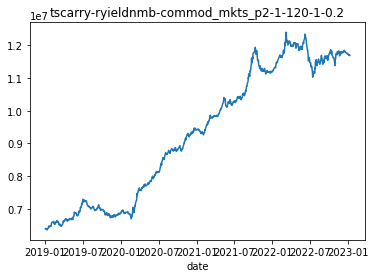

tscarry-ryieldnmb-commod_mkts_p2-1-120-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     0.64           1.08          1.31  62577.39
1.0                     0.43           0.67          0.31  63340.20
2.0                     1.29           2.00          0.85  57314.63
3.0                     2.01           3.07          1.20  51708.79
4.0                     1.86           2.84          1.01  46946.13
5.0                     1.81           2.74          0.93  44617.93
6.0                     1.81           2.70          0.87  41826.16
7.0                     1.85           2.74          0.85  39669.42
8.0                     1.76           2.62          0.78  38393.33
9.0                     1.83           2.73          0.79  37117.80
10.0                    2.00           2.95          0.83  35962.11
11.0                    1.93           2.84          0.77  34722.38


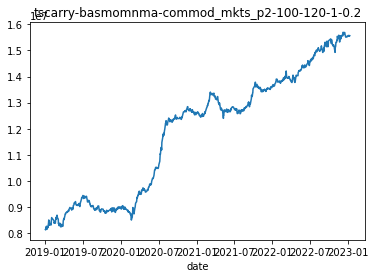

tscarry-basmomnma-commod_mkts_p2-100-120-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.74           2.50          3.75  70391.92
1.0                     1.98           2.95          3.89  63760.36
2.0                     1.64           2.53          1.54  59611.29
3.0                     2.40           3.88          2.26  59715.16
4.0                     2.09           3.37          1.90  57625.41
5.0                     1.93           2.96          1.71  56333.11
6.0                     1.91           2.95          1.63  54087.29
7.0                     1.98           3.08          1.64  52350.10
8.0                     1.64           2.51          1.07  53749.04
9.0                     1.64           2.51          1.04  52446.46
10.0                    1.80           2.74          1.11  50856.97
11.0                    1.87           2.82          1.12  49199.66

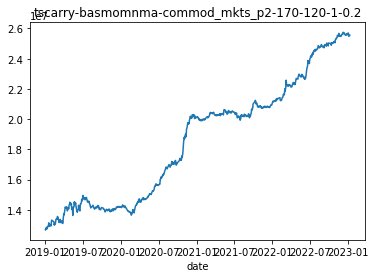

tscarry-basmomnma-commod_mkts_p2-170-120-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     2.97           4.78         10.86  62087.37
1.0                     3.71           6.82          9.89  77278.27
2.0                     2.53           4.61          4.05  70900.73
3.0                     3.32           5.91          5.57  74224.59
4.0                     2.59           4.30          2.54  80548.95
5.0                     2.49           3.98          2.34  77169.74
6.0                     2.36           3.75          2.11  73633.08
7.0                     2.55           4.24          2.36  75860.90
8.0                     2.11           3.41          1.37  77716.92
9.0                     2.16           3.48          1.35  75216.46
10.0                    2.27           3.62          1.38  72640.56
11.0                    2.17           3.41          1.27  69954.07

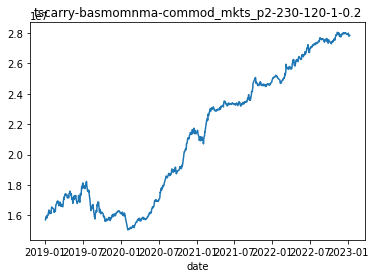

tscarry-basmomnma-commod_mkts_p2-230-120-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio    std_pnl
tenor_in_years                                                      
0.5                     1.54           2.09          4.06   65800.65
1.0                     2.14           3.11          5.37   84980.23
2.0                     2.27           3.76          5.71   93713.67
3.0                     2.72           3.82          3.67   94625.76
4.0                     1.87           2.62          0.97  104499.91
5.0                     1.88           2.64          0.93   99319.48
6.0                     1.81           2.56          0.85   94597.24
7.0                     2.11           3.17          1.05  100634.65
8.0                     1.75           2.61          0.88  101130.89
9.0                     1.79           2.66          0.87   97056.87
10.0                    1.88           2.76          0.87   93141.04
11.0                    1.84           2.64          0

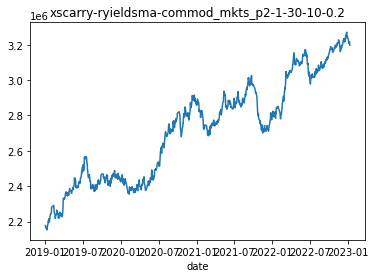

xscarry-ryieldsma-commod_mkts_p2-1-30-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     2.02           3.78          5.13  11733.63
1.0                     1.86           3.01          2.16  14153.85
2.0                     0.71           1.16          0.52  15048.61
3.0                     1.09           1.73          0.82  15344.24
4.0                     1.13           1.77          0.83  15098.38
5.0                     1.33           2.06          0.95  14630.07
6.0                     1.29           1.99          0.90  14250.85
7.0                     1.14           1.77          0.78  13962.79
8.0                     1.24           1.91          0.82  13439.32
9.0                     1.29           2.01          0.84  13281.39
10.0                    1.49           2.33          0.96  13053.91
11.0                    1.51           2.34          0.93  12619.97


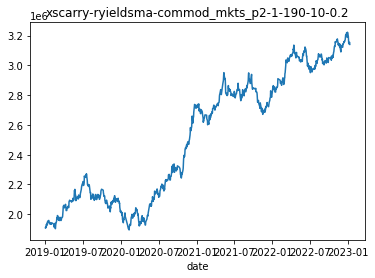

xscarry-ryieldsma-commod_mkts_p2-1-190-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.68           2.73          4.15  13630.97
1.0                     1.32           2.07          1.69  14922.09
2.0                     0.85           1.32          0.78  16179.23
3.0                     1.58           2.50          1.45  16206.15
4.0                     1.26           1.95          0.84  15718.58
5.0                     1.32           2.01          0.85  15280.42
6.0                     1.49           2.28          0.93  14837.86
7.0                     1.43           2.17          0.86  14316.75
8.0                     1.49           2.24          0.86  13764.09
9.0                     1.47           2.23          0.84  13506.32
10.0                    1.61           2.39          0.89  13093.84
11.0                    1.48           2.18          0.79  12627.51


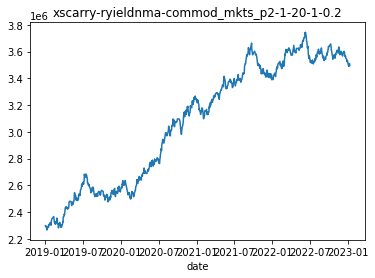

xscarry-ryieldnma-commod_mkts_p2-1-20-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -0.27          -0.38         -0.37  14471.04
1.0                     0.34           0.48          0.32  15121.51
2.0                     0.59           0.94          0.52  15245.97
3.0                     1.23           1.89          1.13  15894.14
4.0                     1.30           2.05          1.16  15510.40
5.0                     1.22           1.92          1.06  14994.31
6.0                     1.39           2.19          1.17  14528.98
7.0                     1.37           2.15          1.12  14136.09
8.0                     1.38           2.13          1.09  13718.75
9.0                     1.33           2.08          1.04  13532.58
10.0                    1.55           2.42          1.19  13285.38
11.0                    1.61           2.46          1.20  12864.85


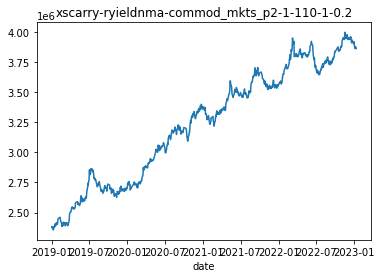

xscarry-ryieldnma-commod_mkts_p2-1-110-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.75           2.24          2.88  14063.06
1.0                     1.03           1.15          0.96  18032.26
2.0                     0.97           1.28          0.86  17236.57
3.0                     1.49           2.06          1.27  16468.78
4.0                     1.54           2.23          1.27  15957.37
5.0                     1.65           2.42          1.30  15245.25
6.0                     1.73           2.51          1.32  14750.83
7.0                     1.67           2.44          1.23  14217.23
8.0                     1.60           2.34          1.14  13757.34
9.0                     1.60           2.37          1.11  13438.18
10.0                    1.74           2.56          1.20  13248.68
11.0                    1.77           2.58          1.18  12834.52


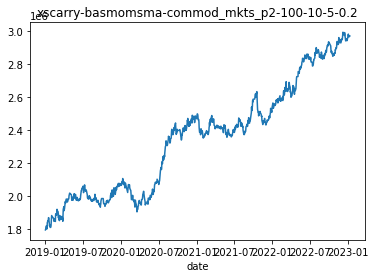

xscarry-basmomsma-commod_mkts_p2-100-10-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.61           2.70          3.60  12451.85
1.0                     1.98           3.08          4.76  14329.37
2.0                     1.15           1.79          1.31  14442.36
3.0                     1.31           2.05          1.52  14803.70
4.0                     1.33           2.10          1.50  14383.28
5.0                     1.30           1.99          1.43  14070.76
6.0                     1.26           1.97          1.35  13698.13
7.0                     1.18           1.85          1.22  13171.34
8.0                     1.15           1.79          1.16  12889.70
9.0                     1.20           1.89          1.19  12565.54
10.0                    1.45           2.27          1.40  12297.71
11.0                    1.53           2.35          1.43  11929.90


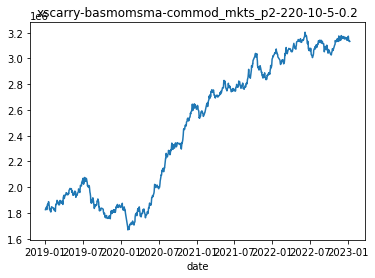

xscarry-basmomsma-commod_mkts_p2-220-10-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.03           1.69          1.81  12662.21
1.0                     0.55           0.86          0.57  13012.69
2.0                     1.22           2.03          1.35  14229.45
3.0                     1.89           2.77          2.19  14939.17
4.0                     1.44           2.10          0.83  14768.82
5.0                     1.67           2.40          0.92  14164.15
6.0                     1.56           2.28          0.83  13607.22
7.0                     1.47           2.17          0.75  13165.91
8.0                     1.40           2.09          0.70  12729.67
9.0                     1.46           2.18          0.71  12431.27
10.0                    1.63           2.42          0.77  12052.80
11.0                    1.60           2.36          0.73  11699.78


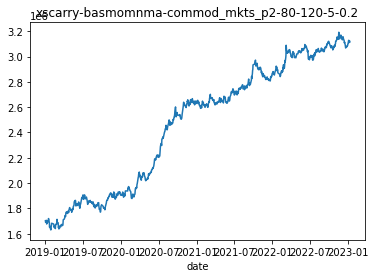

xscarry-basmomnma-commod_mkts_p2-80-120-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.20           1.58          1.95  12671.49
1.0                     1.16           1.76          2.11  14292.11
2.0                     1.16           1.83          1.53  13742.27
3.0                     1.92           3.19          2.52  13632.52
4.0                     1.76           2.84          2.25  13315.67
5.0                     1.65           2.61          2.09  13153.19
6.0                     1.57           2.48          1.92  12700.15
7.0                     1.49           2.34          1.76  12298.80
8.0                     1.47           2.30          1.70  12046.67
9.0                     1.45           2.28          1.64  11759.59
10.0                    1.64           2.55          1.80  11454.28
11.0                    1.65           2.53          1.76  11124.11


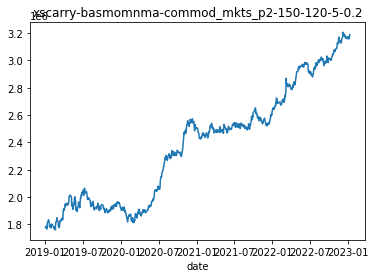

xscarry-basmomnma-commod_mkts_p2-150-120-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     3.28           6.08          9.58  11488.14
1.0                     2.75           5.31          5.30  12904.02
2.0                     1.83           3.24          2.78  12682.18
3.0                     2.08           3.31          2.98  13376.24
4.0                     1.70           2.63          1.46  13603.65
5.0                     1.76           2.69          1.47  13231.76
6.0                     1.69           2.59          1.36  12708.74
7.0                     1.62           2.53          1.27  12382.19
8.0                     1.53           2.40          1.16  11954.63
9.0                     1.60           2.50          1.17  11565.52
10.0                    1.74           2.70          1.24  11223.67
11.0                    1.74           2.66          1.20  10878.20

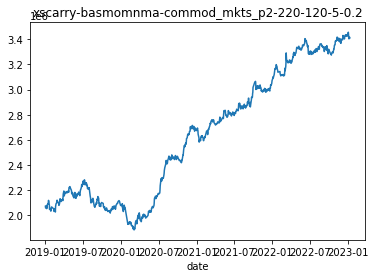

xscarry-basmomnma-commod_mkts_p2-220-120-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     1.29           1.93          2.89  12786.98
1.0                     1.44           2.37          2.43  13999.84
2.0                     1.80           2.85          3.02  13917.09
3.0                     2.08           2.96          2.38  14191.29
4.0                     1.57           2.24          0.88  14053.48
5.0                     1.67           2.39          0.91  13686.05
6.0                     1.78           2.56          0.92  12993.23
7.0                     1.69           2.46          0.86  12707.72
8.0                     1.61           2.36          0.79  12293.33
9.0                     1.67           2.44          0.79  11904.45
10.0                    1.83           2.64          0.84  11457.76
11.0                    1.83           2.58          0.81  11047.74

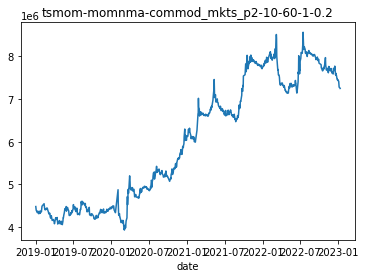

tsmom-momnma-commod_mkts_p2-10-60-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -1.70          -1.87         -1.26  61706.43
1.0                    -0.47          -0.61         -0.44  80471.75
2.0                     0.41           0.56          0.36  76685.12
3.0                     0.80           1.10          0.70  76279.43
4.0                     0.69           0.96          0.55  68547.91
5.0                     0.67           0.92          0.49  63465.80
6.0                     0.57           0.79          0.39  59581.45
7.0                     0.75           1.03          0.52  60281.97
8.0                     0.63           0.84          0.43  59197.66
9.0                     0.66           0.88          0.43  57047.41
10.0                    0.72           0.97          0.46  55140.91
11.0                    0.74           0.99          0.46  53626.52


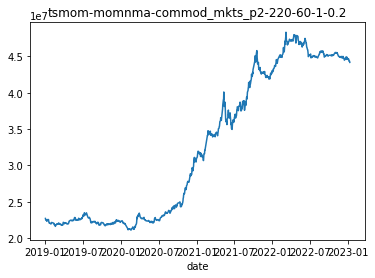

tsmom-momnma-commod_mkts_p2-220-60-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio    std_pnl
tenor_in_years                                                      
0.5                    -0.94          -1.36         -0.92   98529.28
1.0                     0.26           0.36          0.21  211004.54
2.0                     1.28           1.86          1.23  311640.51
3.0                     1.76           2.46          1.47  272396.66
4.0                     1.48           2.04          1.10  240786.16
5.0                     1.32           1.79          0.89  219290.71
6.0                     1.21           1.64          0.80  213862.52
7.0                     1.15           1.57          0.74  208755.05
8.0                     1.17           1.60          0.74  205135.16
9.0                     1.30           1.79          0.80  201760.66
10.0                    1.41           1.95          0.85  194492.26
11.0                    1.39           1.91          0.81  1

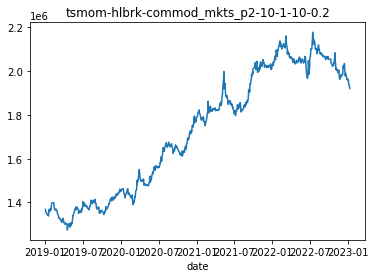

tsmom-hlbrk-commod_mkts_p2-10-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -1.93          -2.28         -1.41  11841.66
1.0                    -0.62          -0.86         -0.50  12931.26
2.0                     0.28           0.40          0.22  12579.89
3.0                     0.87           1.23          0.62  11576.15
4.0                     0.89           1.26          0.58  10565.59
5.0                     0.93           1.33          0.57  10036.32
6.0                     0.84           1.22          0.50   9651.31
7.0                     1.00           1.49          0.59   9554.38
8.0                     0.98           1.44          0.56   9308.03
9.0                     1.10           1.62          0.61   9027.44
10.0                    1.18           1.74          0.64   8776.40
11.0                    1.29           1.90          0.68   8598.42


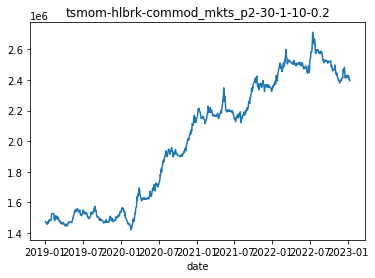

tsmom-hlbrk-commod_mkts_p2-30-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -1.54          -1.83         -1.12  15208.55
1.0                     0.11           0.16          0.08  15561.37
2.0                     0.40           0.59          0.29  15106.01
3.0                     1.26           1.84          0.87  14472.94
4.0                     1.17           1.68          0.73  13115.07
5.0                     1.05           1.52          0.62  12375.06
6.0                     0.94           1.40          0.55  12070.77
7.0                     1.05           1.59          0.60  11984.56
8.0                     1.02           1.52          0.57  11673.04
9.0                     1.16           1.73          0.63  11375.61
10.0                    1.25           1.86          0.66  11077.71
11.0                    1.33           2.00          0.69  10878.48


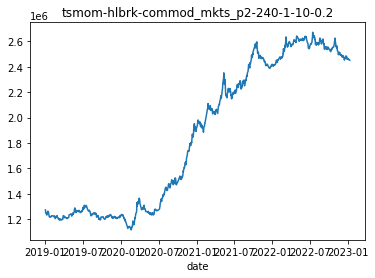

tsmom-hlbrk-commod_mkts_p2-240-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -1.26          -1.72         -1.19  13067.29
1.0                     0.21           0.31          0.19  12815.96
2.0                     0.98           1.52          1.11  15595.87
3.0                     1.76           2.68          1.92  15122.80
4.0                     1.47           2.18          1.44  13542.73
5.0                     1.31           1.92          1.18  12497.53
6.0                     1.16           1.70          1.00  11879.95
7.0                     1.18           1.76          1.01  11804.79
8.0                     1.16           1.73          0.99  11808.89
9.0                     1.33           1.99          1.11  11595.61
10.0                    1.41           2.09          1.14  11212.00
11.0                    1.34           1.98          1.06  10910.85


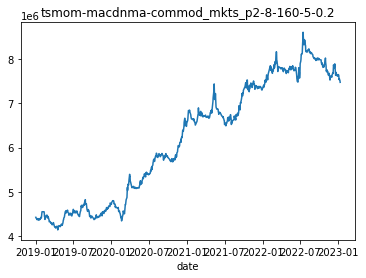

tsmom-macdnma-commod_mkts_p2-8-160-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -1.43          -1.69         -1.12  55948.76
1.0                     0.06           0.09          0.05  59045.81
2.0                     0.37           0.52          0.29  55845.36
3.0                     1.13           1.59          0.82  51824.86
4.0                     1.08           1.51          0.71  46996.17
5.0                     0.94           1.33          0.59  44439.72
6.0                     0.88           1.28          0.53  42757.26
7.0                     1.03           1.53          0.62  42609.20
8.0                     1.00           1.47          0.58  41407.76
9.0                     1.07           1.56          0.60  39881.44
10.0                    1.10           1.60          0.60  38493.01
11.0                    1.18           1.71          0.62  37601.82


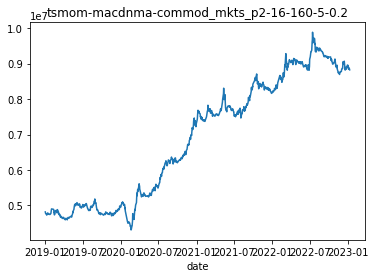

tsmom-macdnma-commod_mkts_p2-16-160-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -1.09          -1.30         -0.87  59881.69
1.0                     0.62           0.86          0.52  63435.00
2.0                     0.61           0.88          0.50  60638.01
3.0                     1.37           1.92          1.09  59860.52
4.0                     1.24           1.72          0.89  53893.87
5.0                     1.05           1.46          0.71  50718.39
6.0                     0.98           1.40          0.64  48929.75
7.0                     1.09           1.59          0.71  48699.00
8.0                     1.06           1.52          0.67  47349.58
9.0                     1.15           1.66          0.70  45704.17
10.0                    1.18           1.70          0.70  44090.90
11.0                    1.22           1.76          0.70  43012.94


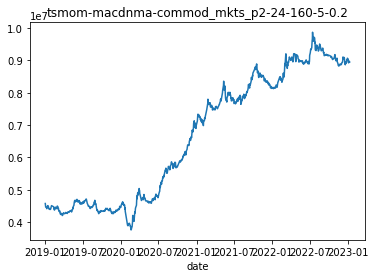

tsmom-macdnma-commod_mkts_p2-24-160-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -0.83          -1.03         -0.77  60507.79
1.0                     0.83           1.15          0.81  64860.94
2.0                     0.83           1.22          0.80  63228.95
3.0                     1.50           2.08          1.45  63843.69
4.0                     1.29           1.77          1.13  57276.64
5.0                     1.06           1.46          0.86  53791.25
6.0                     0.96           1.34          0.62  51932.91
7.0                     1.06           1.50          0.67  51440.43
8.0                     1.04           1.48          0.65  50080.48
9.0                     1.15           1.64          0.69  48432.86
10.0                    1.19           1.69          0.69  46693.04
11.0                    1.18           1.67          0.66  45436.26


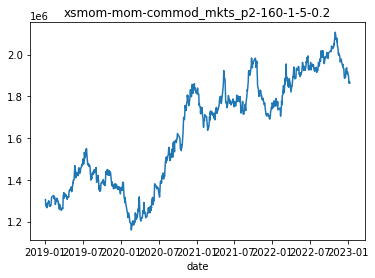

xsmom-mom-commod_mkts_p2-160-1-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -0.79          -1.44         -0.62  12156.13
1.0                     0.44           0.69          0.44  15392.98
2.0                     0.11           0.18          0.10  15905.06
3.0                     0.64           1.04          0.58  16515.62
4.0                     0.62           0.99          0.40  15752.33
5.0                     0.60           0.95          0.37  15256.19
6.0                     0.66           1.05          0.40  14888.69
7.0                     0.54           0.85          0.32  14659.34
8.0                     0.42           0.66          0.24  14049.62
9.0                     0.55           0.85          0.31  13766.53
10.0                    0.80           1.24          0.43  13371.43
11.0                    0.86           1.31          0.45  12927.54


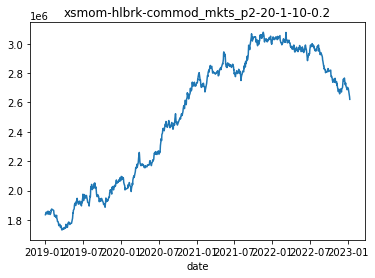

xsmom-hlbrk-commod_mkts_p2-20-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -3.76          -5.47         -1.93  12290.19
1.0                    -2.07          -3.06         -0.93  12966.57
2.0                    -0.35          -0.56         -0.17  14364.00
3.0                     0.82           1.34          0.40  14176.37
4.0                     0.92           1.55          0.44  13764.47
5.0                     0.92           1.54          0.42  13286.15
6.0                     0.77           1.28          0.34  12676.73
7.0                     0.79           1.30          0.34  12375.02
8.0                     0.88           1.45          0.37  11917.38
9.0                     1.08           1.76          0.44  11706.70
10.0                    1.26           2.03          0.50  11400.73
11.0                    1.38           2.20          0.53  11121.09


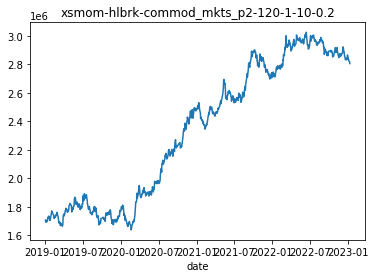

xsmom-hlbrk-commod_mkts_p2-120-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -1.90          -2.99         -1.79  11856.85
1.0                     0.35           0.54          0.39  15248.29
2.0                     0.61           0.98          0.72  16323.00
3.0                     1.34           2.17          1.59  16410.06
4.0                     1.15           1.86          1.13  15813.93
5.0                     1.07           1.70          1.02  15183.38
6.0                     0.86           1.35          0.79  14613.20
7.0                     0.89           1.38          0.79  14140.53
8.0                     0.85           1.31          0.72  13596.34
9.0                     1.03           1.59          0.86  13353.29
10.0                    1.21           1.85          0.98  13015.32
11.0                    1.32           2.01          1.04  12629.34


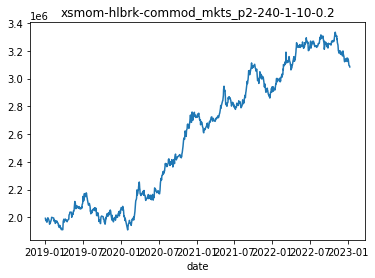

xsmom-hlbrk-commod_mkts_p2-240-1-10-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -1.53          -2.40         -1.25  12860.23
1.0                     0.71           1.11          0.69  15481.23
2.0                     0.74           1.17          0.73  15693.86
3.0                     1.38           2.16          1.39  16024.13
4.0                     1.19           1.87          1.10  15359.16
5.0                     1.21           1.88          1.08  14878.15
6.0                     1.17           1.80          1.00  14323.40
7.0                     1.11           1.72          0.93  13930.47
8.0                     1.08           1.66          0.87  13445.72
9.0                     1.22           1.88          0.96  13157.42
10.0                    1.40           2.14          1.07  12757.80
11.0                    1.48           2.25          1.10  12369.65


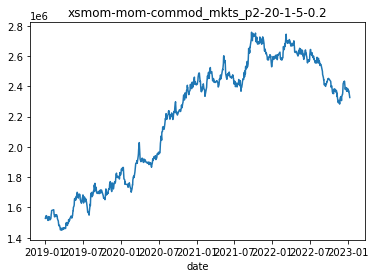

xsmom-mom-commod_mkts_p2-20-1-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -2.71          -4.13         -1.77  13920.58
1.0                    -1.14          -1.78         -0.60  15126.47
2.0                    -0.26          -0.42         -0.15  17364.65
3.0                     0.60           1.00          0.34  16883.94
4.0                     0.79           1.32          0.43  16345.87
5.0                     0.80           1.35          0.43  15839.34
6.0                     0.69           1.14          0.35  15193.38
7.0                     0.73           1.21          0.37  14946.60
8.0                     0.72           1.18          0.35  14418.55
9.0                     0.79           1.29          0.37  14156.73
10.0                    0.97           1.56          0.44  13723.63
11.0                    1.07           1.72          0.48  13358.97


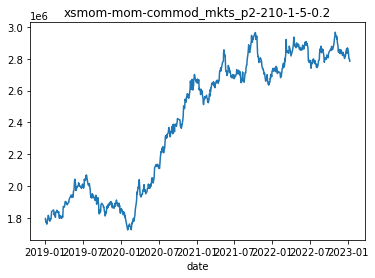

xsmom-mom-commod_mkts_p2-210-1-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     0.26           0.44          0.30  13417.42
1.0                     0.27           0.42          0.33  15375.98
2.0                     0.28           0.45          0.22  16031.27
3.0                     1.26           2.00          1.00  16386.44
4.0                     1.06           1.64          0.77  15754.44
5.0                     0.93           1.42          0.66  15382.38
6.0                     1.10           1.67          0.76  15059.99
7.0                     1.05           1.60          0.71  14701.56
8.0                     0.99           1.50          0.64  14150.11
9.0                     1.06           1.60          0.68  13842.40
10.0                    1.27           1.89          0.78  13418.22
11.0                    1.27           1.87          0.76  12975.33


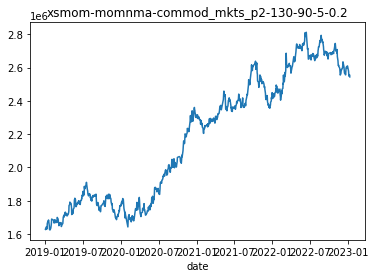

xsmom-momnma-commod_mkts_p2-130-90-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -1.20          -2.04         -1.00  13106.63
1.0                     0.48           0.80          0.47  16643.84
2.0                     0.50           0.79          0.45  16124.81
3.0                     0.99           1.52          0.92  16394.83
4.0                     0.96           1.47          0.84  15531.54
5.0                     0.91           1.38          0.76  14988.38
6.0                     0.94           1.43          0.77  14542.48
7.0                     0.97           1.48          0.77  14219.89
8.0                     1.00           1.52          0.77  13678.96
9.0                     1.05           1.60          0.79  13324.11
10.0                    1.19           1.78          0.86  12910.00
11.0                    1.22           1.81          0.86  12489.74


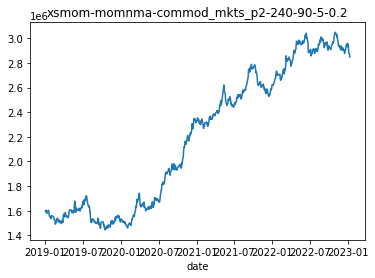

xsmom-momnma-commod_mkts_p2-240-90-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -0.30          -0.49         -0.33  14026.03
1.0                     0.91           1.51          1.13  15757.50
2.0                     1.08           1.82          1.02  15453.32
3.0                     1.88           3.15          1.78  15476.56
4.0                     1.38           2.23          1.19  15057.43
5.0                     1.30           2.09          1.09  14594.54
6.0                     1.42           2.28          1.15  14098.37
7.0                     1.32           2.10          1.04  13676.06
8.0                     1.17           1.84          0.88  13177.97
9.0                     1.22           1.90          0.90  12824.54
10.0                    1.41           2.16          1.00  12376.18
11.0                    1.42           2.12          0.97  11949.66


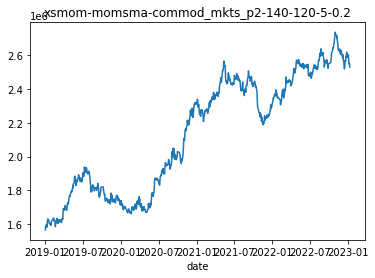

xsmom-momsma-commod_mkts_p2-140-120-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     0.59           1.01          0.62  14320.20
1.0                     0.86           1.47          0.89  14162.38
2.0                     0.51           0.89          0.33  14953.81
3.0                     1.18           2.05          0.75  15076.77
4.0                     1.06           1.77          0.65  14607.18
5.0                     1.12           1.87          0.68  14255.81
6.0                     1.27           2.11          0.75  13985.36
7.0                     1.14           1.87          0.66  13803.92
8.0                     1.05           1.69          0.59  13316.84
9.0                     1.06           1.69          0.58  13020.31
10.0                    1.25           1.97          0.67  12611.02
11.0                    1.23           1.91          0.63  12199.86


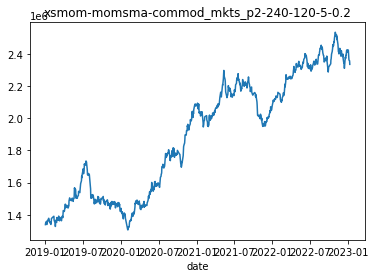

xsmom-momsma-commod_mkts_p2-240-120-5-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                     0.33           0.58          0.37  15479.13
1.0                     1.06           1.70          1.06  14163.47
2.0                     0.59           0.96          0.41  15223.67
3.0                     1.33           2.07          0.93  15362.02
4.0                     1.07           1.64          0.60  15158.26
5.0                     1.11           1.71          0.62  15073.44
6.0                     1.21           1.87          0.66  14595.84
7.0                     1.12           1.72          0.59  14234.67
8.0                     1.13           1.73          0.58  13679.53
9.0                     1.03           1.56          0.51  13292.84
10.0                    1.19           1.79          0.57  12814.49
11.0                    1.13           1.64          0.51  12321.00


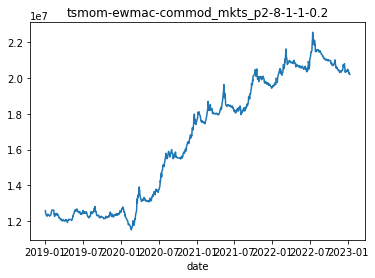

tsmom-ewmac-commod_mkts_p2-8-1-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio    std_pnl
tenor_in_years                                                      
0.5                    -1.42          -1.57         -1.08  112506.26
1.0                     0.33           0.44          0.27  122509.38
2.0                     0.57           0.80          0.46  120842.02
3.0                     1.36           1.93          1.10  120160.15
4.0                     1.20           1.68          0.87  107690.88
5.0                     1.08           1.50          0.73  101098.02
6.0                     0.97           1.38          0.64   97212.63
7.0                     1.12           1.64          0.74   98416.36
8.0                     1.10           1.58          0.71   96237.70
9.0                     1.21           1.75          0.76   93770.39
10.0                    1.28           1.85          0.79   90944.78
11.0                    1.34           1.94          0.80   8891

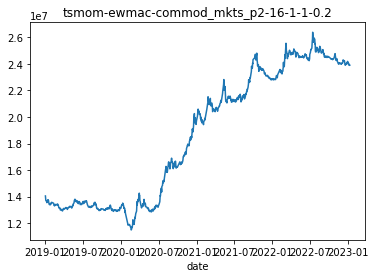

tsmom-ewmac-commod_mkts_p2-16-1-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio    std_pnl
tenor_in_years                                                      
0.5                    -1.09          -1.23         -0.98  141955.37
1.0                     0.47           0.62          0.46  151906.36
2.0                     0.68           0.95          0.69  159825.85
3.0                     1.40           1.94          1.47  164319.57
4.0                     1.16           1.58          1.08  145678.36
5.0                     0.97           1.33          0.68  135072.45
6.0                     0.84           1.16          0.48  129793.72
7.0                     0.99           1.41          0.57  131114.17
8.0                     0.94           1.33          0.53  128428.98
9.0                     1.10           1.58          0.61  127067.32
10.0                    1.17           1.67          0.63  123341.59
11.0                    1.18           1.68          0.62  1195

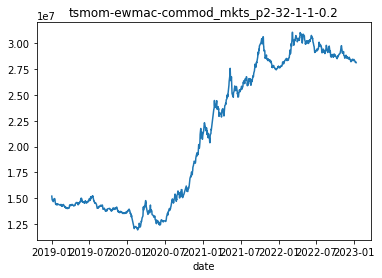

tsmom-ewmac-commod_mkts_p2-32-1-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio    std_pnl
tenor_in_years                                                      
0.5                    -1.05          -1.45         -1.28  151409.75
1.0                     0.15           0.23          0.15  182469.58
2.0                     0.82           1.27          0.94  230169.74
3.0                     1.38           2.06          1.54  225426.86
4.0                     1.10           1.58          1.06  199250.71
5.0                     0.91           1.29          0.60  183068.29
6.0                     0.75           1.06          0.38  174605.39
7.0                     0.80           1.14          0.38  175172.51
8.0                     0.79           1.12          0.37  172380.83
9.0                     0.96           1.40          0.45  173411.46
10.0                    1.05           1.52          0.48  167943.79
11.0                    1.01           1.45          0.44  1620

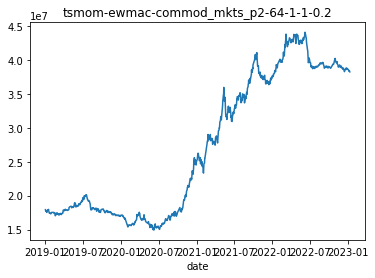

tsmom-ewmac-commod_mkts_p2-64-1-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio    std_pnl
tenor_in_years                                                      
0.5                    -0.88          -1.37         -0.87  124115.23
1.0                     0.08           0.11          0.05  267565.97
2.0                     1.08           1.67          1.07  362673.49
3.0                     1.42           2.10          1.26  324749.28
4.0                     1.17           1.67          0.92  287897.40
5.0                     1.01           1.41          0.72  263888.22
6.0                     0.89           1.24          0.62  253517.43
7.0                     0.77           1.08          0.51  248824.25
8.0                     0.85           1.19          0.48  250699.27
9.0                     0.98           1.40          0.55  250075.54
10.0                    1.07           1.52          0.58  241908.53
11.0                    0.99           1.39          0.52  2335

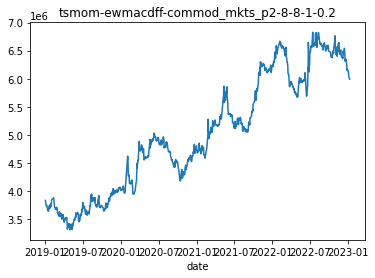

tsmom-ewmacdff-commod_mkts_p2-8-8-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -1.14          -1.39         -1.37  62972.84
1.0                    -0.27          -0.40         -0.33  74971.34
2.0                     0.60           0.87          0.67  69479.09
3.0                     0.63           0.92          0.68  67478.91
4.0                     0.60           0.88          0.59  61879.34
5.0                     0.60           0.88          0.56  58732.43
6.0                     0.49           0.72          0.45  56403.16
7.0                     0.59           0.86          0.53  56424.67
8.0                     0.60           0.88          0.52  54974.31
9.0                     0.52           0.75          0.44  52820.21
10.0                    0.56           0.81          0.46  51435.97
11.0                    0.63           0.92          0.51  50346.37


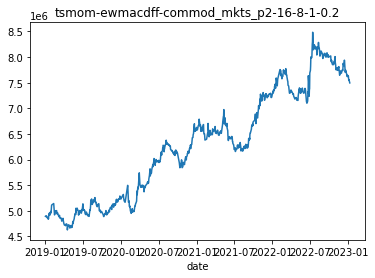

tsmom-ewmacdff-commod_mkts_p2-16-8-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -1.02          -1.17         -0.98  59920.56
1.0                     0.14           0.19          0.15  65753.98
2.0                     0.46           0.66          0.44  59728.40
3.0                     0.84           1.19          0.77  57046.38
4.0                     0.82           1.15          0.69  52182.76
5.0                     0.79           1.12          0.63  49854.75
6.0                     0.77           1.10          0.59  48223.10
7.0                     0.93           1.34          0.72  48465.01
8.0                     0.93           1.32          0.70  47327.28
9.0                     0.89           1.27          0.65  45623.95
10.0                    0.92           1.30          0.65  44428.91
11.0                    1.01           1.44          0.71  43675.02


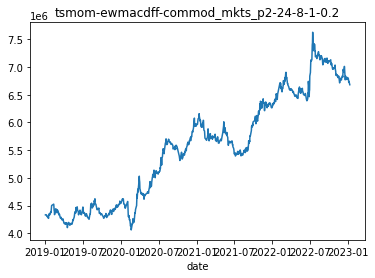

tsmom-ewmacdff-commod_mkts_p2-24-8-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -0.97          -1.10         -0.91  56058.77
1.0                     0.37           0.52          0.36  57071.22
2.0                     0.39           0.56          0.34  51184.38
3.0                     0.90           1.28          0.76  49949.82
4.0                     0.85           1.21          0.65  45574.38
5.0                     0.77           1.09          0.56  43301.02
6.0                     0.76           1.10          0.54  42266.21
7.0                     0.94           1.37          0.68  42953.21
8.0                     0.86           1.24          0.60  41671.89
9.0                     0.89           1.28          0.60  40217.89
10.0                    0.93           1.34          0.61  39142.38
11.0                    1.03           1.47          0.66  38495.00


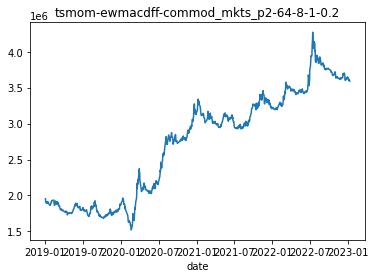

tsmom-ewmacdff-commod_mkts_p2-64-8-1-0.2 
 metric          sharpe_ratio  sortino_ratio  calmar_ratio   std_pnl
tenor_in_years                                                     
0.5                    -1.17          -1.24         -1.02  37183.74
1.0                     0.71           0.87          0.59  35258.52
2.0                     0.26           0.34          0.19  31360.84
3.0                     1.07           1.49          0.84  33680.02
4.0                     0.92           1.27          0.65  30274.12
5.0                     0.75           1.03          0.50  28459.52
6.0                     0.62           0.87          0.37  27519.58
7.0                     0.83           1.21          0.52  28746.54
8.0                     0.73           1.06          0.44  27669.71
9.0                     0.82           1.17          0.48  26669.05
10.0                    0.79           1.13          0.45  25782.77
11.0                    0.86           1.23          0.47  25113.21


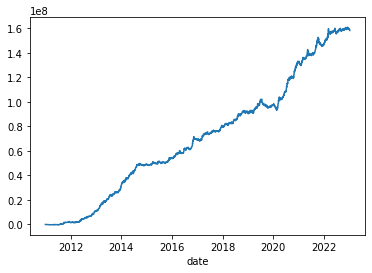

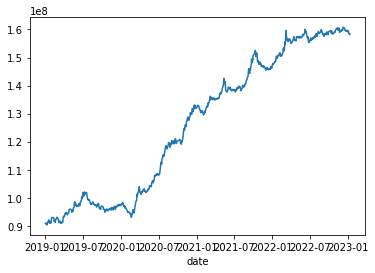

date
2022-11-29    1.596699e+08
2022-11-30    1.597151e+08
2022-12-01    1.595062e+08
2022-12-02    1.598576e+08
2022-12-05    1.597928e+08
2022-12-06    1.597348e+08
2022-12-07    1.598162e+08
2022-12-08    1.606377e+08
2022-12-09    1.607933e+08
2022-12-12    1.605312e+08
2022-12-13    1.605051e+08
2022-12-14    1.604613e+08
2022-12-15    1.604990e+08
2022-12-16    1.603191e+08
2022-12-19    1.595139e+08
2022-12-20    1.594911e+08
2022-12-21    1.596251e+08
2022-12-22    1.596086e+08
2022-12-23    1.596240e+08
2022-12-26    1.596559e+08
2022-12-27    1.594922e+08
2022-12-28    1.591900e+08
2022-12-29    1.594225e+08
2022-12-30    1.596930e+08
2023-01-03    1.594430e+08
2023-01-04    1.590329e+08
2023-01-05    1.584858e+08
2023-01-06    1.584679e+08
2023-01-09    1.585105e+08
2023-01-10    1.581870e+08
Name: daily_pnl, dtype: float64
metric          sharpe_ratio  sortino_ratio  calmar_ratio    std_pnl
tenor_in_years                                                      
0.5            

In [9]:
# res = {}
stats_list = []
cum_list = []
rev_char = '!'

out_cols = ['sharpe_ratio', 'sortino_ratio', 'calmar_ratio', 'std_pnl']
pnl_tenors = ['6m', '1y', '2y', '3y', '4y', '5y', '6y', '7y', '8y', '9y', '10y', '11y']

metal_mixed_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'cu', 'al', 'zn', 'ni', 'sn', ] # 'SM', 'SF', 'ss'
petro_mixed_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc']
ags_mixed_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd']
commod_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'eb', 'eg', 'UR', 'CJ', 'pg', 'SR', 'ni', 'fu', 'lu', 'cs', \
               'bu', 'SF', 'MA', 'SA', 'sp', 'nr', 'T', 'lh', 'PF', 'PK', 'au']
commod_mkts_p1 = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'ss', 'eb', 'eg'] # 'ZC', 
## 'au', 'ag', 'b']

commod_mkts_p2 = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'eb', 'eg', 'UR', 'ss', 'lu', 'lh', 'ni', 'SF', 'CJ',] # 'ZC', ] # 'PK', 'ni', 'SF', 'CJ'

# 'T', 'MA', 'SF', 'lh', 'lu', 'fu'] # 'ZC', 'CJ', ] #


product_list = commod_mkts_p2 # metal_mixed_mkts # +  petro_mixed_mkts #  
# # ind_metal_mkts #commod_all_mkts #  ferrous_products_mkts #+ ferrous_mixed_mkts + base_metal_mkts
product_name = 'commod_mkts_p2' # 'metal_mixed_mkts' #

scenarios = scenarios_elite_new

start_date = datetime.date(2011,1,1)
end_date = datetime.date(2023,1,10)

quantile = 0.2
cost_ratio = 0.5
total_risk = 4600.0
asset_scaling = False
pos_std = 1
std_win = 20
win = 60
ma_win = 120
rebal = 5
params = [0.0, 0.0]
pos_map = (None, {}, '')

exec_field = 'open'

save_loc = "C:\\dev\\data\\combined_carry_" + product_name + "_" + str(end_date) + '_'

run_pos_sum = True
pos_sum = pd.DataFrame()
dpnl_sum = pd.DataFrame()
pos_list = []

port_pnl = pd.Series()
dpnl_by_scen = [] 

for scen in scenarios:
    if len(scen) >= 8:
        sim_name = scen[0]
        if 'ts' in sim_name:
            sim_func = run_ts_test
        elif 'xs' in sim_name:
            sim_func = run_xs_test
            if len(scen) == 9:
                quantile = scen[8]
        run_mode = scen[1]
        weight = scen[2]
        win = scen[3]
        ma_win = scen[4]
        rebal = scen[5]
        pos_map = scen[6]
        params = scen[7]        
    else:
        print("unsupported scenarios")
        continue
    run_args = {}        
    run_args['run_name'] = run_name = '-'.join([sim_name, run_mode, product_name, str(win), str(ma_win), str(rebal), str(quantile)])
    run_args['cost_ratio'] = cost_ratio
    run_args['total_risk'] = total_risk
    run_args['asset_scaling'] = asset_scaling
    run_args['pnl_tenors'] = pnl_tenors
    run_args['exec_field'] = exec_field
    run_args['product_list'] = product_list
    run_args['start_date'] = start_date
    run_args['end_date'] = end_date
    
    run_args['win'] = win
    run_args['ma_win'] = ma_win
    run_args['std_win'] = std_win
    run_args['prefix'] = save_loc        
    run_args['rebal_freq'] = rebal
    run_args['pos_std'] = pos_std
    run_args['params'] = params
    run_args['pos_map'] = pos_map
    run_args['run_mode'] = run_mode
    run_args['quantile'] = quantile
    res = sim_func(run_args)
    res['cum_pnl'][pd.to_datetime('2019-01-01'):].plot(title = run_name)
    plt.show()
    cum_list.append(res['cum_pnl'])
    stats_list.append(res['pnl_stats'])
    vdf = res['pnl_stats']    
    print(run_name, '\n', transform_output(vdf)[out_cols])
    if run_pos_sum:
        pos_list.append(res['pos_df'])
        dpnl_by_scen.append(res['cum_pnl'].diff().dropna())
        pos_sum = pos_sum.add(res['pos_df'] * weight, fill_value = 0) 
        dpnl_sum = dpnl_sum.add(res['dpnl'] * weight, fill_value = 0) 
        port_pnl = port_pnl.add(res['cum_pnl'] * weight, fill_value = 0)

port_pnl.plot()
port_pnl.name = 'daily_pnl'
plt.show()
port_pnl[pd.to_datetime('2019-01-01'):].plot()
plt.show()
res_pnl = backtest.pnl_stats_by_tenor(port_pnl.diff().dropna(), tenors = pnl_tenors, field = None)
vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
print(port_pnl[-30:])
print(transform_output(vdf)[out_cols])
port_pnl.to_csv(file_folder + "port_pnl.csv")
cpnl = dpnl_sum.cumsum()


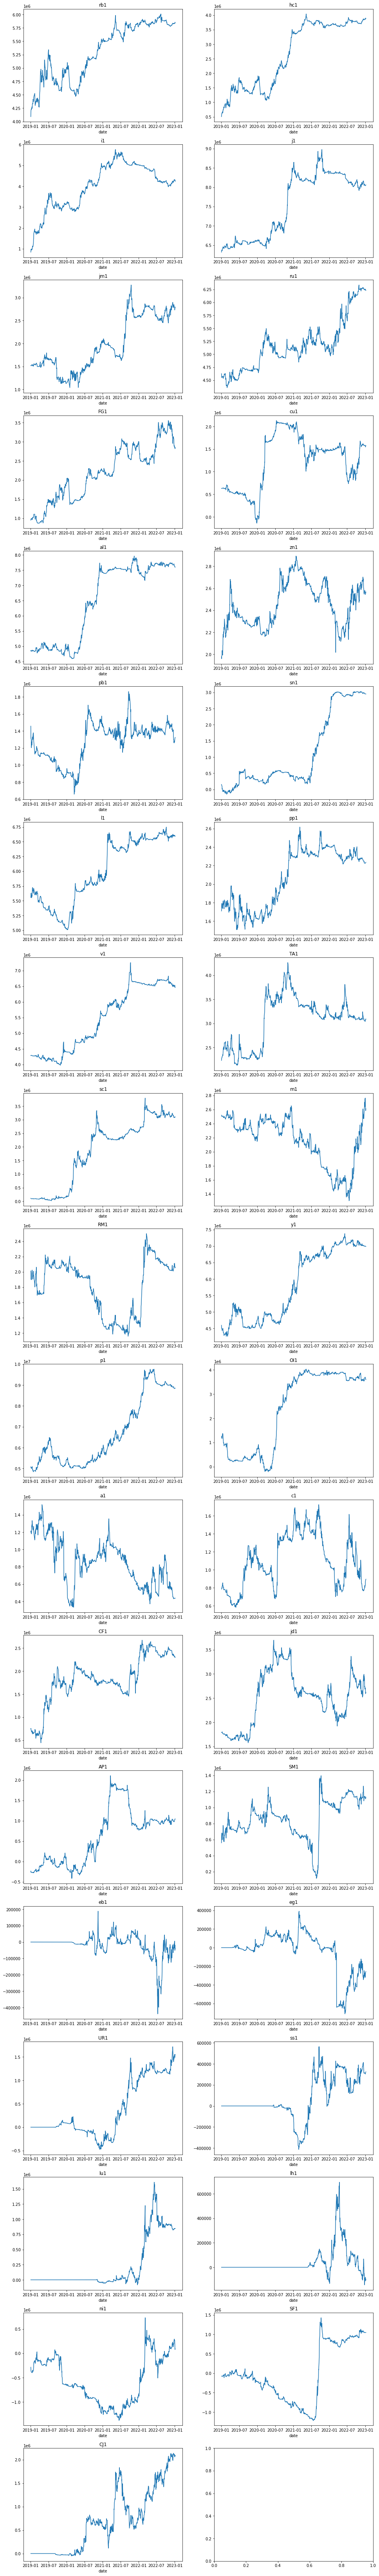

In [25]:
rows = math.ceil(len(product_list)/2)
fig, ax = plt.subplots(rows, 2, figsize=(16, 120))

for i, col in enumerate(cpnl.columns):
    row_id = i//2
    col_id = i % 2
    cpnl[col][datetime.date(2019,1,1):].plot(ax = ax[row_id, col_id], title = col) 


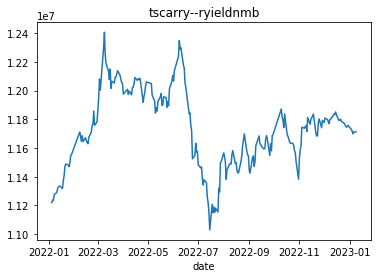

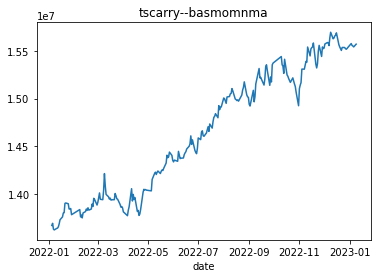

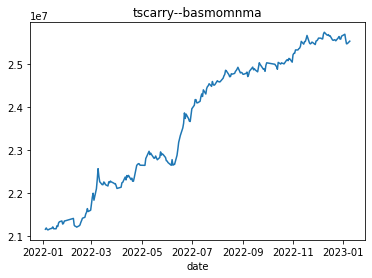

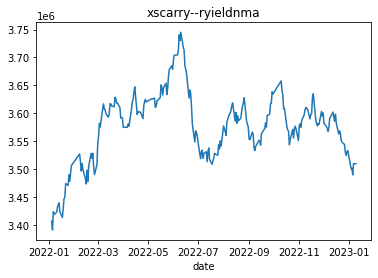

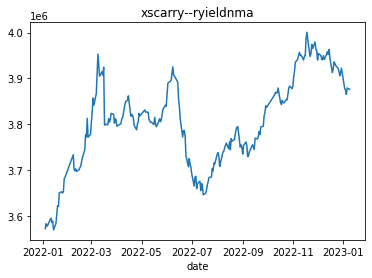

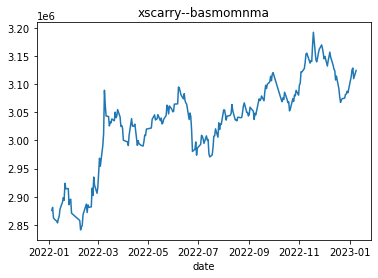

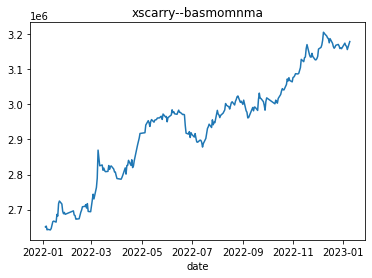

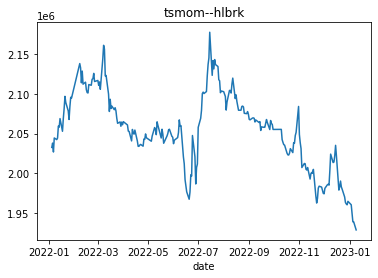

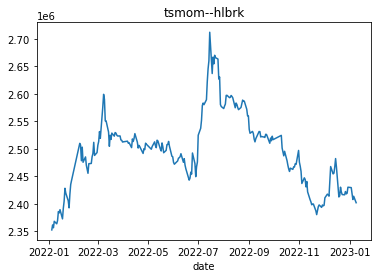

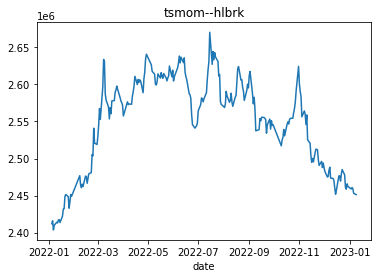

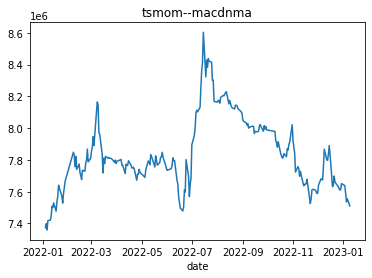

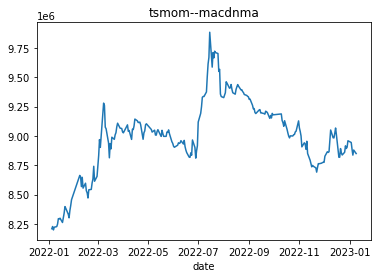

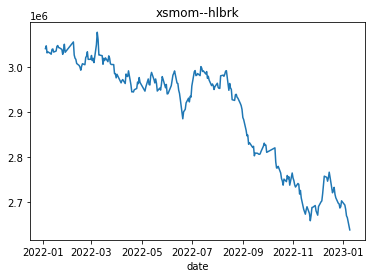

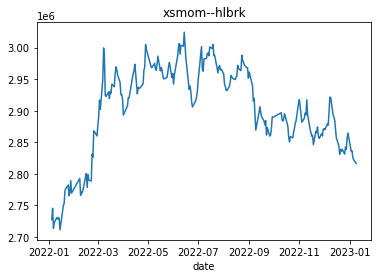

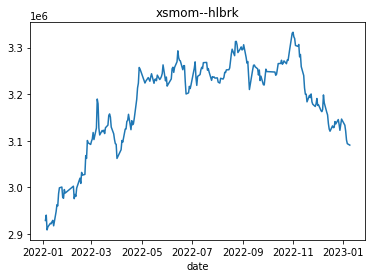

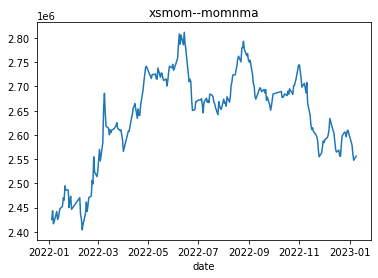

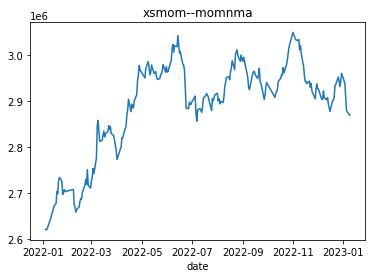

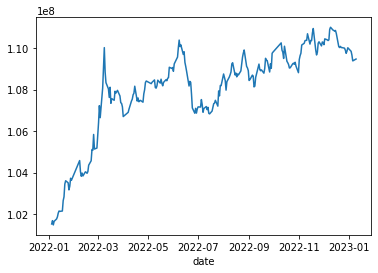

In [26]:
cutoff = pd.to_datetime('2022-01-01')

for (cum_pnl, scen) in zip(cum_list, scenarios):
    sim_name = scen[0]
    run_mode = scen[1]
    cum_pnl[cutoff:].plot(title=f'{sim_name}--{run_mode}')
    plt.show()

port_pnl[cutoff:].plot()
plt.show()
    

In [11]:
cum_df = pd.concat(cum_list, axis = 1)
cum_df.to_csv(save_loc + 'pnl.csv')
stats_df = pd.concat(stats_list, axis = 1)
stats_df.T.to_csv(save_loc + 'stats.csv')
if run_pos_sum:    
    print(pos_sum)

port_pnl.index = pd.to_datetime(port_pnl.index)
print(port_pnl.diff().resample('M').sum()[-60:])

         rb-pos      hc-pos        i-pos       j-pos      jm-pos     ru-pos  \
0      0.000000    0.000000     0.000000    0.000000    0.000000   0.000000   
1      0.000000    0.000000     0.000000    0.000000    0.000000   0.000000   
2      0.000000    0.000000     0.000000    0.000000    0.000000   0.000000   
3      0.000000    0.000000     0.000000    0.000000    0.000000   0.000000   
4      0.000000    0.000000     0.000000    0.000000    0.000000   0.000000   
...         ...         ...          ...         ...         ...        ...   
2912  91.066216  289.570074  2094.949454  223.633661  705.764094 -10.843930   
2913  62.896011  285.883807  2156.700721  209.240036  661.023182 -13.400862   
2914  90.950745  295.312643  2240.893720  183.676939  668.583259 -25.515418   
2915  79.694228  285.320442  2137.348156   83.255265  823.930817 -25.427758   
2916  93.377293  269.057830  2032.488444  201.956782  781.821761   4.605720   

           FG-pos     cu-pos      al-pos     zn-pos

In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { height:200% !important;}</style>"))

sim_name = tscarry, run_mode = ryieldnmb


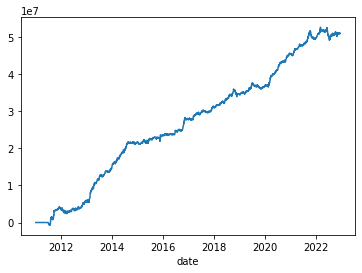

                               0
calmar_ratio_10y        1.343247
calmar_ratio_11y        1.265478
calmar_ratio_1y         0.432671
calmar_ratio_2y         0.851454
calmar_ratio_3y         1.430066
calmar_ratio_4y         1.213252
calmar_ratio_5y         1.182017
calmar_ratio_6m        -0.591743
calmar_ratio_6y         1.142204
calmar_ratio_7y         1.170541
calmar_ratio_8y         1.093496
calmar_ratio_9y         1.203465
sharpe_ratio_10y        2.363659
sharpe_ratio_11y        2.193763
sharpe_ratio_1y         0.581021
sharpe_ratio_2y         1.252675
sharpe_ratio_3y         2.235044
sharpe_ratio_4y         2.032983
sharpe_ratio_5y         2.003665
sharpe_ratio_6m        -0.528568
sharpe_ratio_6y         2.023001
sharpe_ratio_7y         2.121050
sharpe_ratio_8y         1.972074
sharpe_ratio_9y         2.151264
sortino_ratio_10y       3.832298
sortino_ratio_11y       3.478871
sortino_ratio_1y        0.858713
sortino_ratio_2y        1.858030
sortino_ratio_3y        3.403997
sortino_ra

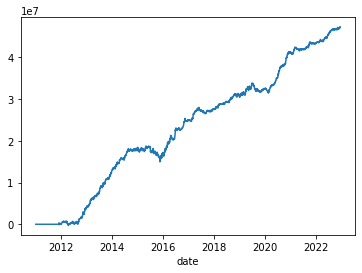

                               0
calmar_ratio_10y        1.192979
calmar_ratio_11y        1.178043
calmar_ratio_1y         7.955179
calmar_ratio_2y         3.360355
calmar_ratio_3y         4.413705
calmar_ratio_4y         1.699067
calmar_ratio_5y         1.676554
calmar_ratio_6m        12.138531
calmar_ratio_6y         1.596142
calmar_ratio_7y         1.892779
calmar_ratio_8y         0.994530
calmar_ratio_9y         1.067194
sharpe_ratio_10y        2.298069
sharpe_ratio_11y        2.294041
sharpe_ratio_1y         2.935843
sharpe_ratio_2y         2.170320
sharpe_ratio_3y         3.248189
sharpe_ratio_4y         2.320702
sharpe_ratio_5y         2.359671
sharpe_ratio_6m         3.029059
sharpe_ratio_6y         2.288078
sharpe_ratio_7y         2.504937
sharpe_ratio_8y         1.907577
sharpe_ratio_9y         2.060263
sortino_ratio_10y       3.614570
sortino_ratio_11y       3.578170
sortino_ratio_1y        4.520494
sortino_ratio_2y        3.507482
sortino_ratio_3y        5.341064
sortino_ra

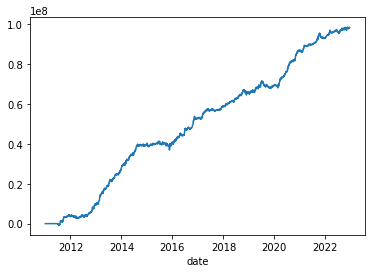

                              0
sharpe_ratio_10y       2.667762
sharpe_ratio_11y       2.585772
sharpe_ratio_1y        1.738471
sharpe_ratio_2y        1.917583
sharpe_ratio_3y        3.064343
sharpe_ratio_4y        2.481634
sharpe_ratio_5y        2.473572
sharpe_ratio_6m        0.805314
sharpe_ratio_6y        2.458576
sharpe_ratio_7y        2.647499
sharpe_ratio_8y        2.239514
sharpe_ratio_9y        2.411286
std_pnl_10y       217923.918277
std_pnl_11y       216810.632511
std_pnl_1y        202754.252111
std_pnl_2y        200639.678697
std_pnl_3y        207886.780257
std_pnl_4y        213210.060886
std_pnl_5y        209716.563349
std_pnl_6m        229436.033203
std_pnl_6y        202392.865954
std_pnl_7y        207528.772594
std_pnl_8y        213817.616447
std_pnl_9y        215851.280814
sim_name = xscarry, run_mode = ryieldsma


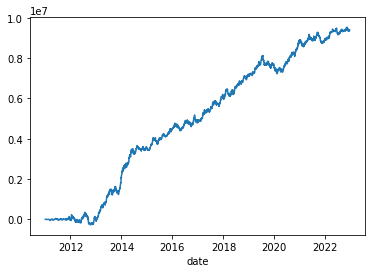

                              0
calmar_ratio_10y       1.061683
calmar_ratio_11y       0.980249
calmar_ratio_1y        1.897144
calmar_ratio_2y        0.602335
calmar_ratio_3y        1.055225
calmar_ratio_4y        0.653281
calmar_ratio_5y        0.767581
calmar_ratio_6m        0.235203
calmar_ratio_6y        0.863336
calmar_ratio_7y        0.810623
calmar_ratio_8y        0.839734
calmar_ratio_9y        0.983235
sharpe_ratio_10y       1.717950
sharpe_ratio_11y       1.598157
sharpe_ratio_1y        1.403372
sharpe_ratio_2y        0.689326
sharpe_ratio_3y        1.126224
sharpe_ratio_4y        1.107037
sharpe_ratio_5y        1.264313
sharpe_ratio_6m        0.120437
sharpe_ratio_6y        1.440181
sharpe_ratio_7y        1.349494
sharpe_ratio_8y        1.430684
sharpe_ratio_9y        1.601437
sortino_ratio_10y      2.672834
sortino_ratio_11y      2.474715
sortino_ratio_1y       2.205043
sortino_ratio_2y       1.071886
sortino_ratio_3y       1.729808
sortino_ratio_4y       1.672511
sortino_

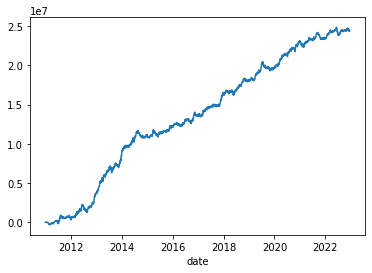

                              0
calmar_ratio_10y       1.926890
calmar_ratio_11y       1.979900
calmar_ratio_1y        0.994884
calmar_ratio_2y        0.732696
calmar_ratio_3y        1.605590
calmar_ratio_4y        1.459265
calmar_ratio_5y        1.507793
calmar_ratio_6m       -0.433681
calmar_ratio_6y        1.639342
calmar_ratio_7y        1.591112
calmar_ratio_8y        1.536775
calmar_ratio_9y        1.673426
sharpe_ratio_10y       1.995810
sharpe_ratio_11y       2.018544
sharpe_ratio_1y        1.138473
sharpe_ratio_2y        0.800100
sharpe_ratio_3y        1.661532
sharpe_ratio_4y        1.628955
sharpe_ratio_5y        1.667025
sharpe_ratio_6m       -0.333864
sharpe_ratio_6y        1.823139
sharpe_ratio_7y        1.770985
sharpe_ratio_8y        1.701778
sharpe_ratio_9y        1.790557
sortino_ratio_10y      3.244850
sortino_ratio_11y      3.271618
sortino_ratio_1y       1.372375
sortino_ratio_2y       1.132262
sortino_ratio_3y       2.539689
sortino_ratio_4y       2.565363
sortino_

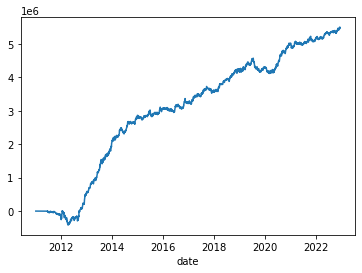

                              0
calmar_ratio_10y       1.155052
calmar_ratio_11y       1.171463
calmar_ratio_1y        4.009660
calmar_ratio_2y        1.643735
calmar_ratio_3y        2.169800
calmar_ratio_4y        0.707951
calmar_ratio_5y        0.882644
calmar_ratio_6m        3.367031
calmar_ratio_6y        0.859309
calmar_ratio_7y        0.817952
calmar_ratio_8y        0.783446
calmar_ratio_9y        0.924925
sharpe_ratio_10y       1.834508
sharpe_ratio_11y       1.788904
sharpe_ratio_1y        2.032677
sharpe_ratio_2y        1.133308
sharpe_ratio_3y        1.579675
sharpe_ratio_4y        1.146985
sharpe_ratio_5y        1.449323
sharpe_ratio_6m        1.321921
sharpe_ratio_6y        1.418650
sharpe_ratio_7y        1.360196
sharpe_ratio_8y        1.294243
sharpe_ratio_9y        1.498872
sortino_ratio_10y      2.965208
sortino_ratio_11y      2.780046
sortino_ratio_1y       3.208867
sortino_ratio_2y       1.814162
sortino_ratio_3y       2.406271
sortino_ratio_4y       1.637407
sortino_

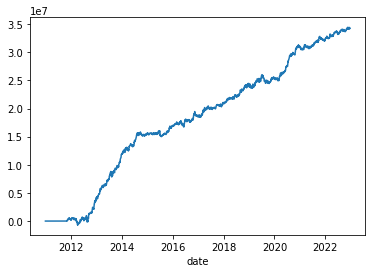

                              0
calmar_ratio_10y       2.097338
calmar_ratio_11y       2.098317
calmar_ratio_1y        4.063287
calmar_ratio_2y        2.027591
calmar_ratio_3y        3.474076
calmar_ratio_4y        1.683000
calmar_ratio_5y        1.848244
calmar_ratio_6m        2.680871
calmar_ratio_6y        1.771253
calmar_ratio_7y        1.719465
calmar_ratio_8y        1.612042
calmar_ratio_9y        1.761070
sharpe_ratio_10y       2.136381
sharpe_ratio_11y       2.097826
sharpe_ratio_1y        1.909883
sharpe_ratio_2y        1.263635
sharpe_ratio_3y        2.201826
sharpe_ratio_4y        1.710908
sharpe_ratio_5y        1.884829
sharpe_ratio_6m        1.008260
sharpe_ratio_6y        1.843605
sharpe_ratio_7y        1.789843
sharpe_ratio_8y        1.696954
sharpe_ratio_9y        1.831278
sortino_ratio_10y      3.425261
sortino_ratio_11y      3.269804
sortino_ratio_1y       3.065463
sortino_ratio_2y       1.895466
sortino_ratio_3y       3.539319
sortino_ratio_4y       2.505434
sortino_

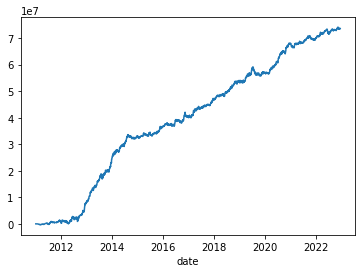

                              0
sharpe_ratio_10y       2.379421
sharpe_ratio_11y       2.370390
sharpe_ratio_1y        2.002319
sharpe_ratio_2y        1.280674
sharpe_ratio_3y        2.242397
sharpe_ratio_4y        1.856250
sharpe_ratio_5y        2.040297
sharpe_ratio_6m        0.556064
sharpe_ratio_6y        2.106211
sharpe_ratio_7y        2.008465
sharpe_ratio_8y        1.955427
sharpe_ratio_9y        2.097659
std_pnl_10y       181401.147708
std_pnl_11y       181964.709550
std_pnl_1y        138085.732624
std_pnl_2y        146586.189455
std_pnl_3y        159892.340400
std_pnl_4y        173791.036563
std_pnl_5y        173190.083099
std_pnl_6m        142180.815213
std_pnl_6y        171009.956795
std_pnl_7y        173068.652188
std_pnl_8y        170870.558585
std_pnl_9y        176552.158221
sim_name = tsmom, run_mode = momnma


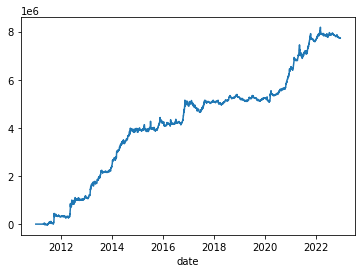

                              0
calmar_ratio_10y       1.220395
calmar_ratio_11y       1.246352
calmar_ratio_1y        0.330838
calmar_ratio_2y        1.384018
calmar_ratio_3y        1.538599
calmar_ratio_4y        1.128092
calmar_ratio_5y        0.976962
calmar_ratio_6m       -0.446326
calmar_ratio_6y        0.816354
calmar_ratio_7y        0.911034
calmar_ratio_8y        0.882066
calmar_ratio_9y        1.121288
sharpe_ratio_10y       1.536621
sharpe_ratio_11y       1.530756
sharpe_ratio_1y        0.376824
sharpe_ratio_2y        1.412333
sharpe_ratio_3y        1.728156
sharpe_ratio_4y        1.417961
sharpe_ratio_5y        1.330130
sharpe_ratio_6m       -0.412736
sharpe_ratio_6y        1.120502
sharpe_ratio_7y        1.203688
sharpe_ratio_8y        1.131106
sharpe_ratio_9y        1.405675
sortino_ratio_10y      2.168784
sortino_ratio_11y      2.179883
sortino_ratio_1y       0.480152
sortino_ratio_2y       2.002186
sortino_ratio_3y       2.453471
sortino_ratio_4y       2.025806
sortino_

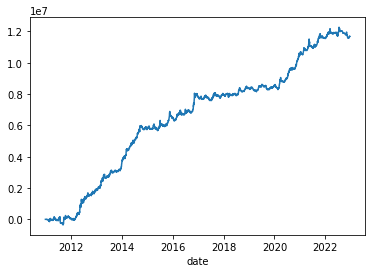

                              0
calmar_ratio_10y       1.460445
calmar_ratio_11y       1.558277
calmar_ratio_1y        0.127068
calmar_ratio_2y        0.957086
calmar_ratio_3y        1.591942
calmar_ratio_4y        1.215070
calmar_ratio_5y        1.104114
calmar_ratio_6m       -0.367653
calmar_ratio_6y        0.900280
calmar_ratio_7y        1.070950
calmar_ratio_8y        1.081511
calmar_ratio_9y        1.394795
sharpe_ratio_10y       1.732696
sharpe_ratio_11y       1.786794
sharpe_ratio_1y        0.156395
sharpe_ratio_2y        1.026174
sharpe_ratio_3y        1.797161
sharpe_ratio_4y        1.511045
sharpe_ratio_5y        1.432880
sharpe_ratio_6m       -0.456076
sharpe_ratio_6y        1.185404
sharpe_ratio_7y        1.335675
sharpe_ratio_8y        1.315642
sharpe_ratio_9y        1.653816
sortino_ratio_10y      2.750723
sortino_ratio_11y      2.859706
sortino_ratio_1y       0.210714
sortino_ratio_2y       1.449764
sortino_ratio_3y       2.634835
sortino_ratio_4y       2.247258
sortino_

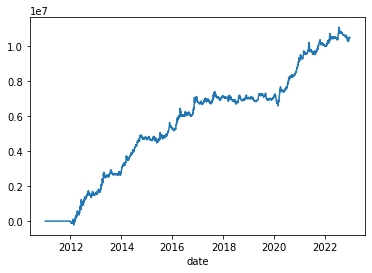

                              0
calmar_ratio_10y       1.153363
calmar_ratio_11y       1.230615
calmar_ratio_1y        0.492722
calmar_ratio_2y        0.898008
calmar_ratio_3y        1.481218
calmar_ratio_4y        1.113123
calmar_ratio_5y        0.882177
calmar_ratio_6m        0.136689
calmar_ratio_6y        0.728718
calmar_ratio_7y        0.934597
calmar_ratio_8y        0.925017
calmar_ratio_9y        1.118907
sharpe_ratio_10y       1.380148
sharpe_ratio_11y       1.399437
sharpe_ratio_1y        0.571332
sharpe_ratio_2y        0.990424
sharpe_ratio_3y        1.643598
sharpe_ratio_4y        1.359391
sharpe_ratio_5y        1.113945
sharpe_ratio_6m        0.162303
sharpe_ratio_6y        0.922336
sharpe_ratio_7y        1.126991
sharpe_ratio_8y        1.111768
sharpe_ratio_9y        1.348703
sortino_ratio_10y      2.137131
sortino_ratio_11y      2.188935
sortino_ratio_1y       0.790861
sortino_ratio_2y       1.405750
sortino_ratio_3y       2.295286
sortino_ratio_4y       1.907041
sortino_

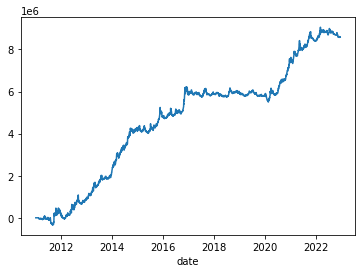

                              0
calmar_ratio_10y       1.116597
calmar_ratio_11y       1.074194
calmar_ratio_1y        0.375914
calmar_ratio_2y        1.439753
calmar_ratio_3y        2.008784
calmar_ratio_4y        1.209235
calmar_ratio_5y        0.832569
calmar_ratio_6m       -0.983275
calmar_ratio_6y        0.619843
calmar_ratio_7y        0.734607
calmar_ratio_8y        0.793165
calmar_ratio_9y        1.054993
sharpe_ratio_10y       1.424518
sharpe_ratio_11y       1.355146
sharpe_ratio_1y        0.378770
sharpe_ratio_2y        1.132104
sharpe_ratio_3y        1.635542
sharpe_ratio_4y        1.291812
sharpe_ratio_5y        1.129408
sharpe_ratio_6m       -1.106310
sharpe_ratio_6y        0.853683
sharpe_ratio_7y        1.015976
sharpe_ratio_8y        1.061809
sharpe_ratio_9y        1.345371
sortino_ratio_10y      2.150890
sortino_ratio_11y      2.049326
sortino_ratio_1y       0.511586
sortino_ratio_2y       1.621235
sortino_ratio_3y       2.371740
sortino_ratio_4y       1.852926
sortino_

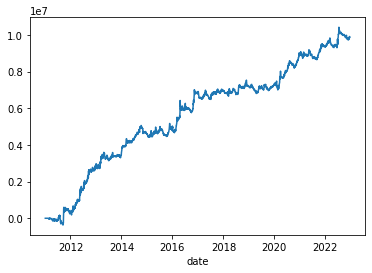

                              0
calmar_ratio_10y       1.013996
calmar_ratio_11y       1.237962
calmar_ratio_1y        0.693571
calmar_ratio_2y        0.820211
calmar_ratio_3y        1.350933
calmar_ratio_4y        0.997970
calmar_ratio_5y        0.824239
calmar_ratio_6m        1.621565
calmar_ratio_6y        0.719642
calmar_ratio_7y        1.014544
calmar_ratio_8y        0.925252
calmar_ratio_9y        1.034386
sharpe_ratio_10y       1.037687
sharpe_ratio_11y       1.187796
sharpe_ratio_1y        0.624371
sharpe_ratio_2y        0.785878
sharpe_ratio_3y        1.284867
sharpe_ratio_4y        1.026956
sharpe_ratio_5y        0.920713
sharpe_ratio_6m        1.204096
sharpe_ratio_6y        0.807494
sharpe_ratio_7y        1.023875
sharpe_ratio_8y        0.941624
sharpe_ratio_9y        1.067454
sortino_ratio_10y      1.552496
sortino_ratio_11y      1.779953
sortino_ratio_1y       0.884800
sortino_ratio_2y       1.137969
sortino_ratio_3y       1.904891
sortino_ratio_4y       1.538804
sortino_

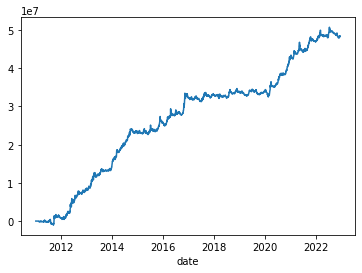

                              0
sharpe_ratio_10y       1.579180
sharpe_ratio_11y       1.618242
sharpe_ratio_1y        0.491373
sharpe_ratio_2y        1.159627
sharpe_ratio_3y        1.788886
sharpe_ratio_4y        1.466082
sharpe_ratio_5y        1.309094
sharpe_ratio_6m        0.174045
sharpe_ratio_6y        1.092430
sharpe_ratio_7y        1.275556
sharpe_ratio_8y        1.243691
sharpe_ratio_9y        1.520051
std_pnl_10y       166787.587909
std_pnl_11y       173583.345769
std_pnl_1y        165712.850609
std_pnl_2y        186126.936202
std_pnl_3y        178386.342925
std_pnl_4y        161024.866758
std_pnl_5y        153563.760394
std_pnl_6m        161480.805153
std_pnl_6y        150877.634928
std_pnl_7y        162148.442623
std_pnl_8y        164308.489972
std_pnl_9y        166690.087982
sim_name = xsmom, run_mode = mom


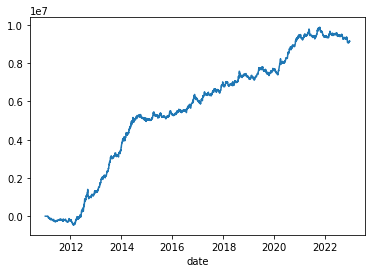

                              0
calmar_ratio_10y       0.997493
calmar_ratio_11y       1.076072
calmar_ratio_1y       -0.380338
calmar_ratio_2y       -0.139142
calmar_ratio_3y        0.618803
calmar_ratio_4y        0.576631
calmar_ratio_5y        0.581446
calmar_ratio_6m       -1.719828
calmar_ratio_6y        0.633388
calmar_ratio_7y        0.677198
calmar_ratio_8y        0.649525
calmar_ratio_9y        0.813393
sharpe_ratio_10y       1.564646
sharpe_ratio_11y       1.652185
sharpe_ratio_1y       -0.549692
sharpe_ratio_2y       -0.244870
sharpe_ratio_3y        1.015634
sharpe_ratio_4y        0.960747
sharpe_ratio_5y        0.950042
sharpe_ratio_6m       -1.999375
sharpe_ratio_6y        1.040638
sharpe_ratio_7y        1.079938
sharpe_ratio_8y        1.055247
sharpe_ratio_9y        1.277372
sortino_ratio_10y      2.539775
sortino_ratio_11y      2.704521
sortino_ratio_1y      -0.797664
sortino_ratio_2y      -0.367732
sortino_ratio_3y       1.642214
sortino_ratio_4y       1.577864
sortino_

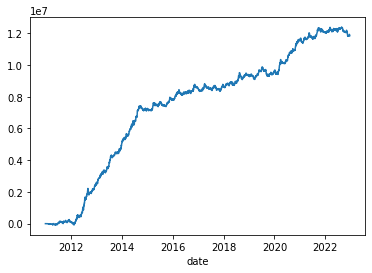

                              0
calmar_ratio_10y       1.673453
calmar_ratio_11y       1.874095
calmar_ratio_1y       -0.431412
calmar_ratio_2y        0.285368
calmar_ratio_3y        1.451617
calmar_ratio_4y        1.085713
calmar_ratio_5y        1.130103
calmar_ratio_6m       -1.399098
calmar_ratio_6y        0.950235
calmar_ratio_7y        0.997770
calmar_ratio_8y        1.024341
calmar_ratio_9y        1.403904
sharpe_ratio_10y       1.741409
sharpe_ratio_11y       1.898248
sharpe_ratio_1y       -0.510318
sharpe_ratio_2y        0.314895
sharpe_ratio_3y        1.489005
sharpe_ratio_4y        1.173105
sharpe_ratio_5y        1.209166
sharpe_ratio_6m       -1.768239
sharpe_ratio_6y        1.042003
sharpe_ratio_7y        1.077655
sharpe_ratio_8y        1.119293
sharpe_ratio_9y        1.476743
sortino_ratio_10y      2.932820
sortino_ratio_11y      3.225814
sortino_ratio_1y      -0.722000
sortino_ratio_2y       0.493275
sortino_ratio_3y       2.492785
sortino_ratio_4y       1.990272
sortino_

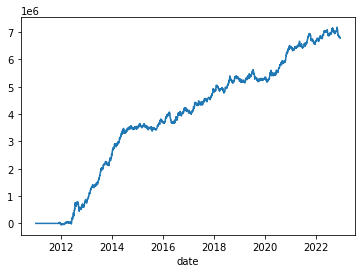

                              0
calmar_ratio_10y       1.359374
calmar_ratio_11y       1.403081
calmar_ratio_1y        0.544577
calmar_ratio_2y        0.468962
calmar_ratio_3y        1.275692
calmar_ratio_4y        0.808691
calmar_ratio_5y        0.910207
calmar_ratio_6m       -1.366905
calmar_ratio_6y        0.987026
calmar_ratio_7y        0.968274
calmar_ratio_8y        0.931783
calmar_ratio_9y        1.116620
sharpe_ratio_10y       1.585925
sharpe_ratio_11y       1.620523
sharpe_ratio_1y        0.610838
sharpe_ratio_2y        0.517408
sharpe_ratio_3y        1.339998
sharpe_ratio_4y        0.957601
sharpe_ratio_5y        1.075595
sharpe_ratio_6m       -1.522660
sharpe_ratio_6y        1.177453
sharpe_ratio_7y        1.138700
sharpe_ratio_8y        1.115134
sharpe_ratio_9y        1.304824
sortino_ratio_10y      2.488519
sortino_ratio_11y      2.540114
sortino_ratio_1y       0.927006
sortino_ratio_2y       0.797461
sortino_ratio_3y       2.052837
sortino_ratio_4y       1.461827
sortino_

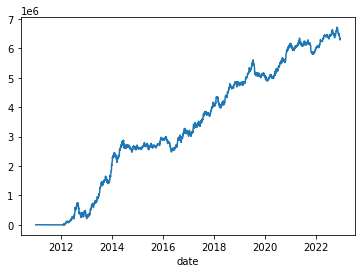

                              0
calmar_ratio_10y       0.854759
calmar_ratio_11y       0.837822
calmar_ratio_1y        1.114204
calmar_ratio_2y        0.245590
calmar_ratio_3y        0.731149
calmar_ratio_4y        0.528159
calmar_ratio_5y        0.670756
calmar_ratio_6m       -0.655643
calmar_ratio_6y        0.763884
calmar_ratio_7y        0.697408
calmar_ratio_8y        0.673493
calmar_ratio_9y        0.740764
sharpe_ratio_10y       1.363126
sharpe_ratio_11y       1.345028
sharpe_ratio_1y        1.457580
sharpe_ratio_2y        0.364194
sharpe_ratio_3y        1.013038
sharpe_ratio_4y        0.900910
sharpe_ratio_5y        1.116848
sharpe_ratio_6m       -0.778215
sharpe_ratio_6y        1.256521
sharpe_ratio_7y        1.128848
sharpe_ratio_8y        1.106035
sharpe_ratio_9y        1.185215
sortino_ratio_10y      2.103825
sortino_ratio_11y      2.045703
sortino_ratio_1y       2.217700
sortino_ratio_2y       0.563787
sortino_ratio_3y       1.547110
sortino_ratio_4y       1.331442
sortino_

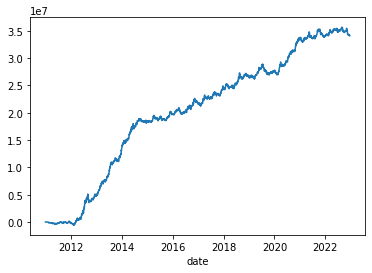

                              0
sharpe_ratio_10y       1.783367
sharpe_ratio_11y       1.868490
sharpe_ratio_1y        0.161167
sharpe_ratio_2y        0.251451
sharpe_ratio_3y        1.390269
sharpe_ratio_4y        1.150675
sharpe_ratio_5y        1.235120
sharpe_ratio_6m       -1.770174
sharpe_ratio_6y        1.265202
sharpe_ratio_7y        1.245031
sharpe_ratio_8y        1.247711
sharpe_ratio_9y        1.493906
std_pnl_10y       106896.019467
std_pnl_11y       108436.187884
std_pnl_1y         87549.972639
std_pnl_2y         93328.324858
std_pnl_3y        101746.685940
std_pnl_4y        101474.703275
std_pnl_5y        103593.303788
std_pnl_6m         85589.957012
std_pnl_6y        103014.690018
std_pnl_7y        105089.568911
std_pnl_8y        102813.192776
std_pnl_9y        106498.035496
          0         1         2         3
0  1.000000  0.738408  0.377104  0.531576
1  0.738408  1.000000  0.263705  0.674289
2  0.377104  0.263705  1.000000  0.559748
3  0.531576  0.674289  0.559748 

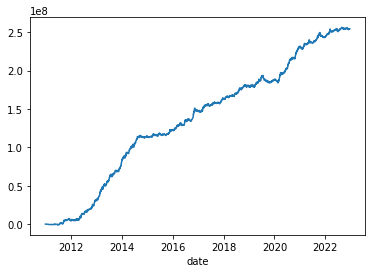

                              0
sharpe_ratio_10y       2.804545
sharpe_ratio_11y       2.843635
sharpe_ratio_1y        1.681603
sharpe_ratio_2y        1.671352
sharpe_ratio_3y        2.775809
sharpe_ratio_4y        2.285581
sharpe_ratio_5y        2.331528
sharpe_ratio_6m        0.379096
sharpe_ratio_6y        2.297175
sharpe_ratio_7y        2.429185
sharpe_ratio_8y        2.324548
sharpe_ratio_9y        2.539702
std_pnl_10y       523087.137902
std_pnl_11y       518864.668933
std_pnl_1y        430845.517201
std_pnl_2y        485701.016802
std_pnl_3y        524584.685019
std_pnl_4y        527021.027883
std_pnl_5y        515150.539562
std_pnl_6m        370421.820911
std_pnl_6y        501894.328889
std_pnl_7y        508279.042645
std_pnl_8y        492828.184129
std_pnl_9y        513170.864999


In [18]:
cutoff_date = datetime.date(2017,12,12)

dpnl_cutoff = []
for dpnl in dpnl_by_scen:
    dpnl_cutoff.append(dpnl[dpnl.index >= cutoff_date])

combo_dpnl = pd.concat(dpnl_cutoff, axis = 1)
combo_dpnl.columns = [ '_'.join([scen[0], scen[1], str(idx)]) for idx, scen in enumerate(scenarios)]
    
combo_dpnl.corr().to_csv(file_folder + "port_corr.csv")
pnl_dict = {}    
for idx, (scen, dpnl) in enumerate(zip(scenarios, dpnl_by_scen)):    
    if scen[0] not in pnl_dict:
        pnl_dict[scen[0]] = {}
    if scen[1] not in pnl_dict[scen[0]]:
        pnl_dict[scen[0]][scen[1]] = pd.Series()
    pnl_dict[scen[0]][scen[1]] = pnl_dict[scen[0]][scen[1]].add(dpnl * scen[2], fill_value = 0)

pnl_by_sim = []
for sim_name in pnl_dict:
    pnl_list = []
    for run_mode in pnl_dict[sim_name]:
        print("sim_name = %s, run_mode = %s" % (sim_name, run_mode))
        pnl_list.append(pnl_dict[sim_name][run_mode])
        cpnl = pnl_dict[sim_name][run_mode].cumsum()        
        cpnl.plot()
        plt.show()
        res_pnl = backtest.pnl_stats_by_tenor(pnl_dict[sim_name][run_mode].dropna(), tenors = pnl_tenors, field = None)
        vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
        vdf = vdf.loc[[idx for idx in vdf.index if ('sharpe' in idx) or ('sortino' in idx) or 
                       ('calmar' in idx) or ('std' in idx)], :]
        print(vdf)            
    print("corr for sim_name = %s" % sim_name)
    xdf = pd.concat(pnl_list, axis = 1)
    tdf = xdf[xdf.index >= cutoff_date]
    print(tdf.corr())
    print("combined pnl for sim_name = %s" % sim_name)
    adf = xdf.sum(axis=1)
    pnl_by_sim.append(adf)
    adf.cumsum().plot()
    plt.show()
    res_pnl = backtest.pnl_stats_by_tenor(adf.dropna(), tenors = pnl_tenors, field = None)
    vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    vdf = vdf.loc[[idx for idx in vdf.index if ('sharpe' in idx) or ('std' in idx)], :]
    print(vdf)
xdf = pd.concat(pnl_by_sim, axis = 1)
tdf = xdf[xdf.index >= cutoff_date]
print(tdf.corr())
print("combined pnl for sim_name = %s" % sim_name)
adf = xdf.sum(axis=1)
pnl_by_sim.append(adf)
adf.cumsum().plot()
plt.show()
res_pnl = backtest.pnl_stats_by_tenor(adf.dropna(), tenors = pnl_tenors, field = None)
vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
vdf = vdf.loc[[idx for idx in vdf.index if ('sharpe' in idx) or ('std' in idx)], :]
print(vdf)

In [13]:
save_xl = True
if run_pos_sum and save_xl:
    xlfile = save_loc + "pos_data.xlsx"
    writer = pd.ExcelWriter(xlfile)
    for idx in range(len(pos_list)):            
        pos_list[idx].to_excel(writer, str(idx), startcol= 0, startrow=1)
    pos_sum.to_excel(writer, "sum", startcol= 0, startrow=1)
    writer.save()    


In [9]:
print(df)

           index  rb1-open  rb1-high  rb1-low  rb1-close  rb1-volume  \
0     2011-01-04    2373.0    2386.0   2348.0     2365.0      275428   
1     2011-01-05    2343.0    2360.0   2332.0     2336.0      214902   
2     2011-01-06    2349.0    2368.0   2345.0     2352.0      186136   
3     2011-01-07    2343.0    2371.0   2320.0     2336.0      369032   
4     2011-01-10    2344.0    2394.0   2344.0     2377.0      436038   
...          ...       ...       ...      ...        ...         ...   
2499  2021-04-19    5122.0    5143.0   5058.0     5082.0     2509136   
2500  2021-04-20    5091.0    5171.0   5070.0     5165.0     2137195   
2501  2021-04-21    5158.0    5189.0   5125.0     5188.0     2026507   
2502  2021-04-22    5195.0    5238.0   5175.0     5208.0     2569897   
2503  2021-04-23    5225.0    5300.0   5205.0     5299.0     2115301   

      rb1-openInterest rb1-contract  rb1-shift  rb1-contmth  ...  AP2-open  \
0               576934       rb1105    -2457.0       2011

In [ ]:
res = {}
stats_list = []
cum_list = []
sratio_years = [int(ten[:-1]) for ten in pnl_tenors]
rev_char = '!'

metal_mixed_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'ni']
petro_mixed_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc']
ags_mixed_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd']
commod_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'eb', 'eg', 'UR', 'CJ', 'pg', 'SR', 'ni', 'fu', 'lu', 'cs', \
               'bu', 'SF', 'MA', 'SA', 'sp', 'nr']
commod_mkts_p1 = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM']
               ## 'au', 'ag', 'b']
commod_mkts_p2 = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM', 'eb', 'eg', 'UR', 'CJ', 'ss', 'pg']

product_list = commod_mkts # metal_mixed_mkts # +  petro_mixed_mkts #  
product_name = 'commod_mkts'

sim_name = 'tsmom'
run_mode = 'skew'

start_date = datetime.date(2011,1,1)
end_date = datetime.date(2019,6,30)
quantile = 0.2
cost_ratio = 0.5
pos_std = 1
std_win = 20

win = 16
ma_win = 8
rebal = 5
params = [0.0, 0.0]

exec_field = 'open'
save_loc = "C:\\dev\\data\\selected_%s_" % ('_'.join([sim_name, run_mode, product_name, str(quantile), str(end_date)]))

#curve_list = ['linear', 'semilinear', 'reverting', 'absorbing', 'sigmoid', 'band']
crv_param = 2.0

index_list = [5, 10, 20, 40, 60, 80, 120, 180, 240] # [i for i in range(10, 330, 10)]  # [1, 2, 3, 4, 5, 10, 15, 20, 25, 30] # [1, 3, 5, 7, 10, 15, 20] # + range(10, 250, 10) # 
column_list =  [10, 20, 40, 60] #   curve_list #   [1, 2, 3, 4, 5, 10, 15, 20] # range(10, 130, 10) # # [60, 80, 100, 120, 140, 160] #[i * 0.01 for i in range(0, 32, 4)] #

sratio = {}
run_sratio = True

pos_sum = pd.DataFrame()
pos_list = []
scenarios = list(itertools.product(index_list, column_list))

if 'ts' in sim_name:
    sim_func = run_ts_test
elif 'xs' in sim_name:
    sim_func = run_xs_test
if run_sratio:
    for yr in sratio_years:
        sratio[yr] = pd.DataFrame(0, index = index_list, columns = column_list)

port_pnl = pd.Series()
#pos_map = (None, {}, '')
#pos_map = (misc.sign, {}, 'sign')
pos_map = (dh.response_curve, {'param': crv_param, "response": 'reverting'}, 'reverting')

for scen in scenarios:
    scen_x = scen[0]
    scen_y = scen[1]
    if run_mode in ['ryield']:
        win = 1
        ma_win = 1
        rebal = scen_x
        pos_map = (dh.response_curve, {'param': crv_param, "response": scen_y}, scen_y)
        if sim_name == 'xscarry':
            quantile = scen_x * 0.1
    elif run_mode in ['basmom', 'mom', 'clbrk', 'hlbrk', 'ewmac']:
        win = scen_x
        ma_win = 1
        rebal = scen_y
    elif run_mode in ['ewmacdff']:
        win = scen_x
        rebal = scen_y
        params = params
    elif run_mode in ['skew!ema']:
        win = scen_x
        ma_win = scen_y
        rebal = 1
        params = [0.0, 0.0]
    elif run_mode in ['mixmom']:
        win = scen_x
        ma_win = 1
        rebal = scen_y
    elif ('ts' in sim_name) and (run_mode in ['ryieldxma', 'ryieldsma', \
                                              'ryieldnma', 'ryieldnmb', 'ryieldzlv', \
                                              'lrskewsma', 'lrkurtsma', 'trdstrsma',\
                                              'upstdsma', 'volmfratiosma']):
        win = 1
        ma_win = scen_x
        rebal = scen_y
        #pos_map = (dh.response_curve, {'param': crv_param, "response": scen_y}, scen_y)
    elif ('xs' in sim_name) and (run_mode in ['ryieldxma', 'ryieldsma', \
                                              'ryieldnma', 'ryieldnmb', 'ryieldzlv', \
                                              'lrskewsma', 'lrkurtsma', 'trdstrsma',\
                                              'upstdsma', 'volmfratiosma']):
        win = 1
        ma_win = scen_x
        rebal = scen_y    
    elif run_mode in ['basmomxma', 'basmomsma', 'basmomnma', 'basmomnmb', 'basmomzlv', \
                      'momsma', 'momxma', 'momnma', 'momnmb', 'momzlv', 'macdnma']:
        win = scen_x
        ma_win = 120
        rebal = 5
        if run_mode in ['macdnma']:
            params = [scen_y, 80.0/win]
    else:
        print("unsupported run_mode")
        continue

    run_args = {}        
    run_args['run_name'] = run_name = '-'.join([sim_name, run_mode, product_name, str(win), str(ma_win), str(rebal), str(quantile)])
    run_args['cost_ratio'] = cost_ratio
    run_args['exec_field'] = exec_field
    run_args['product_list'] = product_list
    run_args['start_date'] = start_date
    run_args['end_date'] = end_date
    
    run_args['win'] = win
    run_args['ma_win'] = ma_win
    run_args['std_win'] = std_win
    run_args['prefix'] = save_loc        
    run_args['rebal_freq'] = rebal
    run_args['pos_std'] = pos_std
    run_args['params'] = params
    run_args['pos_map'] = pos_map
    run_args['run_mode'] = run_mode
    run_args['quantile'] = quantile
    res = sim_func(run_args)
    res['cum_pnl'].plot()
    plt.show()
    cum_list.append(res['cum_pnl'])
    stats_list.append(res['pnl_stats'])
    vdf = res['pnl_stats']
    vdf = vdf.loc[[idx for idx in vdf.index if ('sharpe' in idx) or ('sortino' in idx) or 
                   ('calmar' in idx) or ('std' in idx)], :]
    print(vdf)
    if run_sratio:
        for yr in sratio_years:
            lbl = 'sharpe_ratio_' + str(yr) + 'y'
            sratio[yr][scen_y].loc[scen_x] = res['pnl_stats'][run_name][lbl]

cum_df = pd.concat(cum_list, axis = 1)
cum_df.to_csv(save_loc + 'pnl.csv')
stats_df = pd.concat(stats_list, axis = 1)
stats_df.T.to_csv(save_loc + 'stats.csv')

if run_sratio:
    for yr in sratio_years:
        print(sratio[yr])